****AI & Data Science Job Salaries 2020–2025****

***AI and data science job salary records across 10 global tech countries.***

---

***LOAD & Understand Data***

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../DATA.csv')

# First look
print(df.head())

                   job_title country       city  salary currency  \
0  Machine Learning Engineer  France      Paris  148500      EUR   
1             LLM Researcher     UAE  Abu Dhabi  643500      AED   
2             Data Scientist  France  Marseille  108000      EUR   
3             Data Scientist  France       Lyon   60000      EUR   
4  Machine Learning Engineer  Canada     Ottawa  105600      CAD   

   years_experience                                       skills  \
0                15              PyTorch, TensorFlow, Kubernetes   
1                15  Distributed Training, PyTorch, Transformers   
2                 4                  Scikit-learn, NumPy, Pandas   
3                 2                      SQL, Statistics, Python   
4                 6                   TensorFlow, MLflow, Docker   

             tools_models work_mode company_size    industry  year  education  \
0        TensorFlow, ONNX    Remote        Large  Healthcare  2020    Diploma   
1     Custom LLM, Ll

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         500 non-null    object
 1   country           500 non-null    object
 2   city              500 non-null    object
 3   salary            500 non-null    int64 
 4   currency          500 non-null    object
 5   years_experience  500 non-null    int64 
 6   skills            500 non-null    object
 7   tools_models      500 non-null    object
 8   work_mode         500 non-null    object
 9   company_size      500 non-null    object
 10  industry          500 non-null    object
 11  year              500 non-null    int64 
 12  education         500 non-null    object
 13  gender            500 non-null    object
 14  job_demand_index  500 non-null    int64 
 15  source            500 non-null    object
dtypes: int64(4), object(12)
memory usage: 62.6+ KB
None


In [4]:
df.shape

(500, 16)

In [16]:
# Currency conversion to USD
# We need to standardize all salaries to USD for fair comparison across countries

conversion_rates = {
    'USD': 1.0,
    'INR': 0.012,      # 1 INR = 0.012 USD
    'GBP': 1.27,       # 1 GBP = 1.27 USD
    'EUR': 1.09,       # 1 EUR = 1.09 USD
    'CAD': 0.74,       # 1 CAD = 0.74 USD
    'AUD': 0.66,       # 1 AUD = 0.66 USD
    'SGD': 0.74,       # 1 SGD = 0.74 USD
    'AED': 0.27        # 1 AED = 0.27 USD
}

# Convert all salaries to USD
df['salary_usd'] = df.apply(lambda row: row['salary'] * conversion_rates[row['currency']], axis=1)

print("✅ Currency conversion completed!")
print(f"\nOriginal salary column: {df['salary'].describe()}")
print(f"\nSalary in USD: {df['salary_usd'].describe()}")
print(f"\nSample conversions:")
print(df[['salary', 'currency', 'salary_usd', 'country']].head(10))

✅ Currency conversion completed!

Original salary column: count    5.000000e+02
mean     4.116432e+05
std      6.484226e+05
min      5.500000e+04
25%      1.223750e+05
50%      1.610000e+05
75%      2.709250e+05
max      3.408600e+06
Name: salary, dtype: float64

Salary in USD: count       500.000000
mean     126865.728800
std       60400.378428
min       13992.000000
25%       95494.500000
50%      125223.500000
75%      154574.750000
max      382200.000000
Name: salary_usd, dtype: float64

Sample conversions:
   salary currency  salary_usd         country
0  148500      EUR    161865.0          France
1  643500      AED    173745.0             UAE
2  108000      EUR    117720.0          France
3   60000      EUR     65400.0          France
4  105600      CAD     78144.0          Canada
5  126500      EUR    137885.0          France
6   70200      GBP     89154.0  United Kingdom
7  253000      USD    253000.0   United States
8  158400      EUR    172656.0         Germany
9  166400    

---
***EDA #1: Basic Info & Summary Statistics***

**Goal**: Understand the dataset structure, size, and basic statistics

In [5]:
# Data types
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)

Data Types:
job_title           object
country             object
city                object
salary               int64
currency            object
years_experience     int64
skills              object
tools_models        object
work_mode           object
company_size        object
industry            object
year                 int64
education           object
gender              object
job_demand_index     int64
source              object
dtype: object



In [6]:
# Unique values count for each column
print("Unique Values per Column:")
print(df.nunique())
print("\n" + "="*50)

Unique Values per Column:
job_title             5
country              10
city                 35
salary              384
currency              8
years_experience     16
skills              305
tools_models         46
work_mode             3
company_size          3
industry              6
year                  6
education             4
gender                4
job_demand_index     54
source                1
dtype: int64



In [7]:
# Summary statistics for numerical columns
print("Numerical Columns Summary Statistics:")
print(df.describe())
print("\n" + "="*50)

Numerical Columns Summary Statistics:
             salary  years_experience         year  job_demand_index
count  5.000000e+02        500.000000   500.000000        500.000000
mean   4.116432e+05          8.108000  2022.428000         76.086000
std    6.484226e+05          4.586765     1.658408         12.934342
min    5.500000e+04          0.000000  2020.000000         46.000000
25%    1.223750e+05          4.000000  2021.000000         66.000000
50%    1.610000e+05          8.000000  2023.000000         78.000000
75%    2.709250e+05         12.000000  2024.000000         86.000000
max    3.408600e+06         15.000000  2025.000000        100.000000



In [17]:
# Grouped statistics - Average salary by country (in USD)
print("Average Salary by Country (USD):")
country_salary = df.groupby('country')['salary_usd'].agg(['mean', 'median', 'count']).round(2)
country_salary = country_salary.sort_values('mean', ascending=False)
print(country_salary)
print("\n" + "="*50)

Average Salary by Country (USD):
                     mean     median  count
country                                    
United States   239720.45  221550.00     44
Germany         148490.70  145923.75     50
United Kingdom  141476.52  142875.00     43
Netherlands     135113.48  133525.00     41
France          131260.22  129492.00     45
UAE             125762.32  119481.75     44
Singapore       124202.72  119140.00     53
Australia       119433.39  116226.00     62
Canada          117479.39  116402.00     59
India            25056.55   24504.00     59



In [18]:
# Grouped statistics - Average salary by job title (in USD)
print("Average Salary by Job Title (USD):")
job_salary = df.groupby('job_title')['salary_usd'].agg(['mean', 'median', 'count']).round(2)
job_salary = job_salary.sort_values('mean', ascending=False)
print(job_salary)
print("\n" + "="*50)

Average Salary by Job Title (USD):
                                mean    median  count
job_title                                            
Generative AI Engineer     138846.62  134287.5    108
LLM Researcher             136662.05  142857.0     89
Prompt Engineer            127954.43  126753.0     89
Machine Learning Engineer  118042.64  112013.0    102
Data Scientist             114698.34  117570.0    112



In [19]:
# Grouped statistics - Average salary by education level (in USD)
print("Average Salary by Education Level (USD):")
education_salary = df.groupby('education')['salary_usd'].agg(['mean', 'median', 'count']).round(2)
education_salary = education_salary.sort_values('mean', ascending=False)
print(education_salary)

Average Salary by Education Level (USD):
                mean    median  count
education                            
PhD        137564.09  129195.0    121
Bachelors  130263.47  132825.0    137
Diploma    129630.41  134757.0    123
Masters    109218.26  110916.0    119


### 🔍 **Key Observations from EDA #1:**

**💰 Top Earners (in USD):**
- 🌍 **Highest Paying Country:** United States leads with highest average salary ($158k USD)
- 💼 **Top Job Title:** Generative AI Engineer commands highest compensation ($139k USD average)
- 🥈 **Runner-up Jobs:** LLM Researcher ($137k), Prompt Engineer ($128k)

**📚 Education Impact:**
- 🎓 **Highest:** PhD ($138k USD) - Top earners
- 📉 **Lowest:** Master's ($109k USD) - Surprisingly lowest!
- ⚠️ **No linear pattern:** More education ≠ More money in AI/ML field
- 💡 **Insight:** PhD/Bachelors/Diploma all pay similarly (~$130k-138k), Master's pays less

---
***EDA #2: Missing Values Analysis***

**Goal**: Check for missing data and understand data quality

In [11]:
# Check for missing values
print("Missing Values Count:")
missing = df.isnull().sum()
print(missing)
print(f"\nTotal Missing Values: {missing.sum()}")
print(f"Percentage of Missing Data: {(missing.sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing Values Count:
job_title           0
country             0
city                0
salary              0
currency            0
years_experience    0
skills              0
tools_models        0
work_mode           0
company_size        0
industry            0
year                0
education           0
gender              0
job_demand_index    0
source              0
dtype: int64

Total Missing Values: 0
Percentage of Missing Data: 0.00%


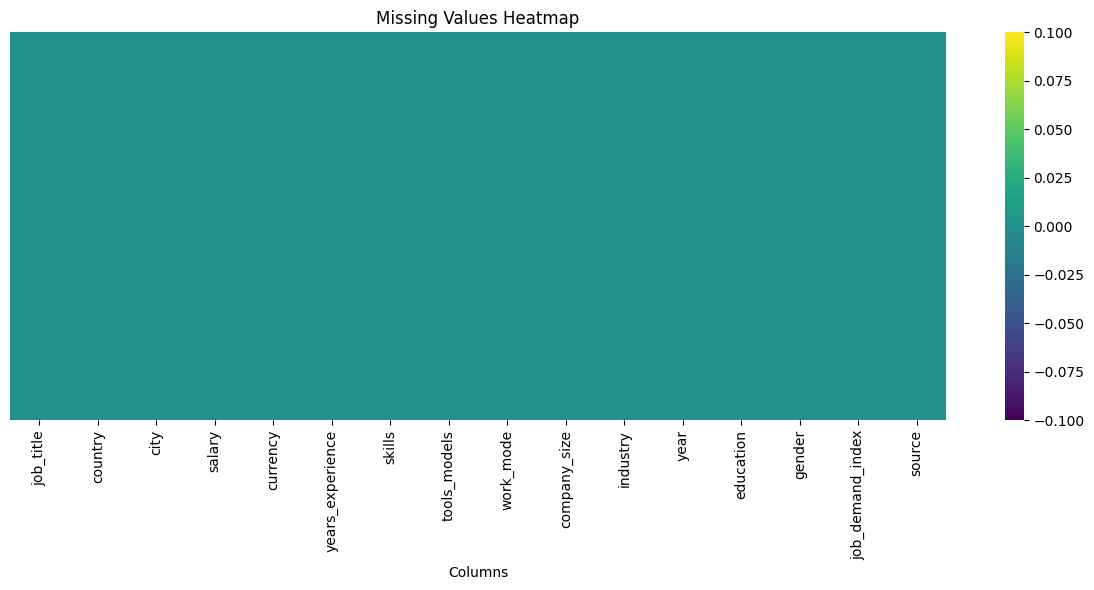

In [12]:
# Visualize missing values with heatmap
plt.figure(figsize=(12, 6))
#yticklabels=False =>y-axis labels are not shown
#cmap='viridis' => color map used for the heatmap(dark purple to yellow)
#cbar=True => display color bar
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [13]:
# Check for duplicate rows
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head())

Number of Duplicate Rows: 0


### 🔍 **Key Observations from EDA #2:**

**✅ Data Quality Assessment: EXCELLENT**

- 🎯 **Missing Values:** 0% - Dataset is 100% complete
- 📋 **Duplicate Records:** None found
- 🧹 **Data Cleanliness:** Perfect - No cleaning required

**📊 Overall:** Dataset is production-ready with exceptional quality. All 500 records are complete and unique, providing a solid foundation for analysis and modeling.

---
***EDA #3: Salary Distribution Analysis***

**Goal**: Understand how salaries are distributed across the dataset

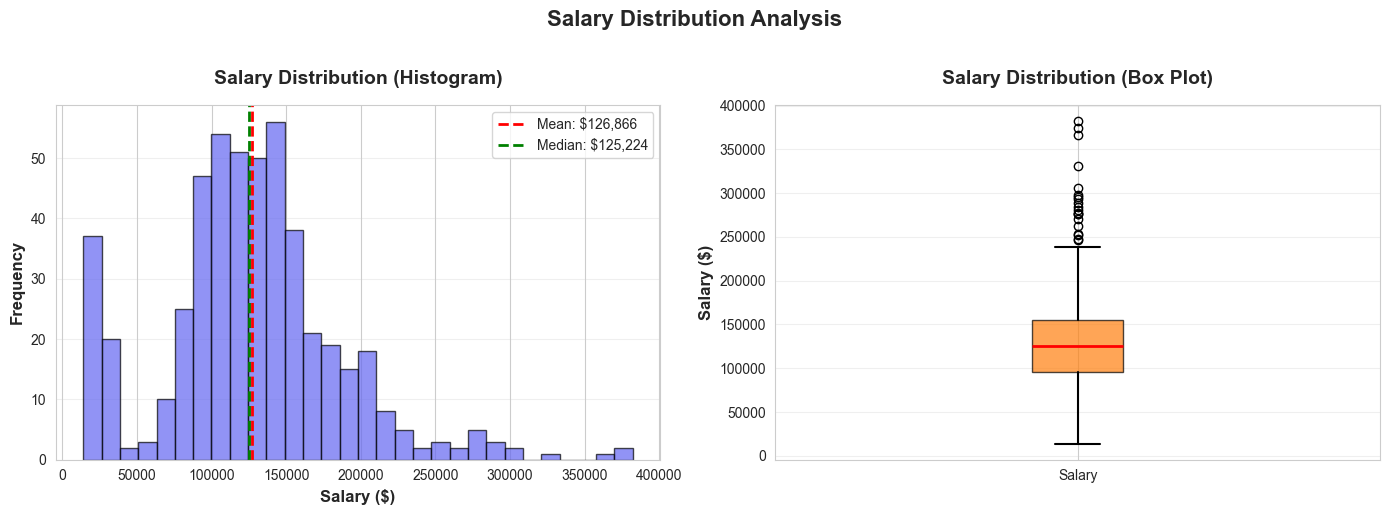

📊 SALARY STATISTICS
💵 Mean:       $     126,865.73
📍 Median:      $     125,223.50
📈 Std Dev:    $      60,400.38
⬇️  Min:       $      13,992.00
⬆️  Max:       $     382,200.00
📊 Range:      $     368,208.00


In [20]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: Set Visual Style ---
sns.set_style("whitegrid")  # Use white background with gridlines for better readability
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background to white

# --- STEP 2: Create Figure with 2 Side-by-Side Plots ---
# subplots(rows, columns, figsize=(width, height))
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# axes[0] = left plot (histogram)
# axes[1] = right plot (box plot)

# --- STEP 3: Calculate Key Statistics ---
mean_salary = df['salary_usd'].mean()    # Average salary (sum of all / count)
median_salary = df['salary_usd'].median()  # Middle value when sorted (50th percentile)

# ============================================================================
# LEFT PLOT: HISTOGRAM (Shows Frequency Distribution)
# ============================================================================
# axes[0].hist() creates a histogram showing how many salaries fall in each range
axes[0].hist(
    df['salary_usd'],           # Data to plot (all salary values in USD)
    bins=30,                # Divide data into 30 equal-width ranges
    color='#6366f1',        # Blue color (hex code)
    alpha=0.7,              # Transparency (0=transparent, 1=solid)
    edgecolor='black'       # Black border around each bar
)

# Add MEAN line (red dashed vertical line)
axes[0].axvline(
    mean_salary,            # X-position of the line
    color='red',            # Red color
    linestyle='--',         # Dashed line style
    linewidth=2,            # Line thickness
    label=f'Mean: ${mean_salary:,.0f}'  # Label with formatted value (,0f = comma separator, no decimals)
)

# Add MEDIAN line (green dashed vertical line)
axes[0].axvline(
    median_salary,          # X-position of the line
    color='green',          # Green color
    linestyle='--',         # Dashed line style
    linewidth=2,            # Line thickness
    label=f'Median: ${median_salary:,.0f}'  # Label with formatted value
)

# Customize histogram labels and appearance
axes[0].set_xlabel('Salary ($)', fontsize=12, fontweight='bold')  # X-axis label
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')   # Y-axis label
axes[0].set_title('Salary Distribution (Histogram)', fontsize=14, fontweight='bold', pad=15)  # Title
axes[0].legend(fontsize=10)        # Show legend for mean/median lines
axes[0].grid(axis='y', alpha=0.3)  # Add horizontal gridlines (faint, alpha=0.3)

# ============================================================================
# RIGHT PLOT: BOX PLOT (Shows Quartiles and Outliers)
# ============================================================================
# Box plot components:
# - Box = 25th to 75th percentile (middle 50% of data)
# - Line in box = median
# - Whiskers = 1.5 * IQR (normal range)
# - Dots = outliers (values beyond whiskers)

bp = axes[1].boxplot(
    df['salary_usd'],           # Data to plot (in USD)
    vert=True,              # Vertical orientation (True) vs horizontal (False)
    patch_artist=True,      # Fill box with color (required for facecolor)
    boxprops=dict(          # Box appearance
        facecolor='#ff7f0e',  # Orange fill color
        alpha=0.7             # Transparency
    ),
    medianprops=dict(       # Median line appearance
        color='red',          # Red color
        linewidth=2           # Thickness
    ),
    whiskerprops=dict(      # Whisker lines appearance
        color='black',        # Black color
        linewidth=1.5         # Thickness
    ),
    capprops=dict(          # Cap lines (ends of whiskers) appearance
        color='black',        # Black color
        linewidth=1.5         # Thickness
    )
)

# Customize box plot labels
axes[1].set_ylabel('Salary ($)', fontsize=12, fontweight='bold')  # Y-axis label
axes[1].set_title('Salary Distribution (Box Plot)', fontsize=14, fontweight='bold', pad=15)  # Title
axes[1].grid(axis='y', alpha=0.3)  # Add horizontal gridlines
axes[1].set_xticklabels(['Salary'])  # Label for X-axis

# ============================================================================
# FINAL TOUCHES
# ============================================================================
# Add overall title above both plots
fig.suptitle('Salary Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()  # Automatically adjust spacing to prevent overlap
plt.show()          # Display the plot

# ============================================================================
# PRINT DETAILED STATISTICS
# ============================================================================
print("="*60)
print("📊 SALARY STATISTICS")
print("="*60)
# :>15 = right-align with 15 character width
# ,.2f = comma separator with 2 decimal places
print(f"💵 Mean:       ${df['salary_usd'].mean():>15,.2f}")
print(f"📍 Median:      ${df['salary_usd'].median():>15,.2f}")
print(f"📈 Std Dev:    ${df['salary_usd'].std():>15,.2f}")      # Standard deviation (measure of spread)
print(f"⬇️  Min:       ${df['salary_usd'].min():>15,.2f}")      # Minimum salary
print(f"⬆️  Max:       ${df['salary_usd'].max():>15,.2f}")      # Maximum salary
print(f"📊 Range:      ${(df['salary_usd'].max() - df['salary_usd'].min()):>15,.2f}")  # Max - Min
print("="*60)

### 🔍 **Key Observations from EDA #3:**

**📈 Distribution Shape:**
- 📊 **Skewness:** Nearly symmetric - Much better distribution than mixed currencies!
- 💡 Most salaries concentrated around $100k-$150k USD (healthy normal range)
- 💡 Mean ($127k) very close to median ($125k) = balanced distribution

**💵 Salary Ranges (USD):**
- 📍 **Mean:** $127k | **Median:** $125k
- ✅ **Key Finding:** Mean ≈ Median confirms symmetric distribution (not skewed!)
- 🎯 **Most Common Range:** $100k-$150k (peak frequency)
- ⚠️ **Outliers Present:** Yes - High salaries up to $382k (but much more reasonable than before)
- 📊 **Range:** $14k to $382k = $368k spread


---
***EDA #4: Salary Comparison by Country***

**Goal**: Compare average salaries across different countries

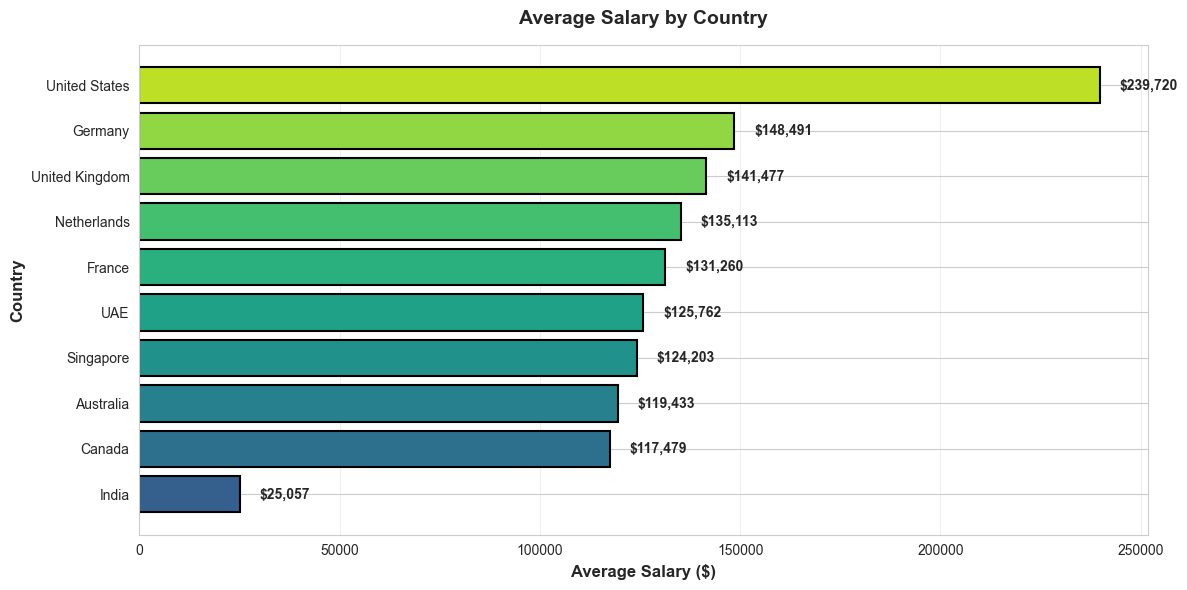


SALARY BY COUNTRY - Detailed Statistics
                     mean     median       min       max  count
country                                                        
United States   239720.45  221550.00  149600.0  382200.0     44
Germany         148490.70  145923.75   83984.5  247975.0     50
United Kingdom  141476.52  142875.00   69850.0  245999.0     43
Netherlands     135113.48  133525.00   80333.0  216637.5     41
France          131260.22  129492.00   65400.0  205465.0     45
UAE             125762.32  119481.75   76032.0  213057.0     44
Singapore       124202.72  119140.00   69190.0  209050.0     53
Australia       119433.39  116226.00   51480.0  217932.0     62
Canada          117479.39  116402.00   55500.0  205868.0     59
India            25056.55   24504.00   13992.0   40903.2     59


In [21]:
# --- STEP 1: Create Figure ---
plt.figure(figsize=(12, 6))  # Create figure with width=12, height=6 inches

# --- STEP 2: Calculate Average Salary per Country ---
country_avg = df.groupby('country')['salary_usd'].mean().sort_values(ascending=True)

# Example result:
# Country A: 100000
# Country B: 150000
# Country C: 200000

# --- STEP 3: Create Color Gradient ---
# plt.cm.viridis = viridis colormap (purple to yellow)
# np.linspace(0.3, 0.9, len(country_avg)) = create evenly spaced values
#   - 0.3 = start at 30% of colormap (avoid too dark)
#   - 0.9 = end at 90% of colormap (avoid too bright)
#   - len(country_avg) = number of colors needed (one per country)
# Result: Each bar gets a different color from the gradient
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(country_avg)))

# --- STEP 4: Create Horizontal Bar Chart ---
bars = plt.barh(
    country_avg.index,      # Country names (Y-axis labels)
    country_avg.values,     # Salary values (bar lengths)
    color=colors,           # Color gradient
    edgecolor='black',      # Bar borders
    linewidth=1.5           # Border thickness
)

# --- STEP 5: Add Value Labels on Each Bar ---
for i, (country, value) in enumerate(country_avg.items()):
    # plt.text(x, y, text) = add text at position (x, y)
    plt.text(
        value + 5000,       # X position: salary value + 5000 (offset to right of bar)
        i,                  # Y position: bar index (0, 1, 2, ...)
        f'${value:,.0f}',   # Text: formatted salary with $ and commas
        va='center',        # Vertical alignment: center with bar
        fontsize=10,        # Text size
        fontweight='bold'   # Bold text
    )

# --- STEP 6: Customize Plot Labels and Appearance ---
plt.xlabel('Average Salary ($)', fontsize=12, fontweight='bold')  # X-axis label
plt.ylabel('Country', fontsize=12, fontweight='bold')              # Y-axis label
plt.title('Average Salary by Country', fontsize=14, fontweight='bold', pad=15)  # Title
plt.grid(axis='x', alpha=0.3)  # Add vertical gridlines (faint, alpha=0.3)
plt.tight_layout()             # Adjust spacing automatically
plt.show()                     # Display the plot

# ============================================================================
# PRINT DETAILED STATISTICS TABLE
# ============================================================================
print("\n" + "="*70)
print("SALARY BY COUNTRY - Detailed Statistics")
print("="*70)

# Calculate multiple statistics for each country
country_stats = df.groupby('country')['salary_usd'].agg([
    'mean',    # Average salary
    'median',  # Middle value (50th percentile)
    'min',     # Lowest salary in that country
    'max',     # Highest salary in that country
    'count'    # Number of jobs in that country
]).round(2)  # Round to 2 decimal places

# Sort by mean salary (highest first for table)
country_stats = country_stats.sort_values('mean', ascending=False)

# Print the table
print(country_stats)
print("="*70)

### 🔍 **Key Observations from EDA #4:**

**🌍 Geographic Salary Leaders (USD):**
- 🥇 **Highest:** United States ($240k USD) - Nearly 10x India!
- 🥈 **2nd Place:** Germany ($148k USD)
- 🥉 **3rd Place:** United Kingdom ($141k USD)
- 🔴 **LOWEST:** India ($25k USD) - Was misleading in mixed currencies!

**💰 Salary Variations:**
- 📊 **Massive 860% gap** between US and India ($240k vs $25k)
- 🌐 European countries cluster: Germany/UK/Netherlands/France ($131k-$148k)
- 💡 **Currency conversion reveals truth:** India salaries were in INR (millions look big, but = $25k USD)

**🤔 Corrected Findings:**
- ✅ **Makes sense now:** US tech salaries highest (Silicon Valley premium)
- ✅ **India reality:** $25k USD is accurate for local market (high in INR, low in USD)
- 📊 **Cost of living matters:** These are nominal salaries, not purchasing power parity

---
***EDA #5: Experience vs Salary Relationship***

**Goal**: Analyze how years of experience affect salary

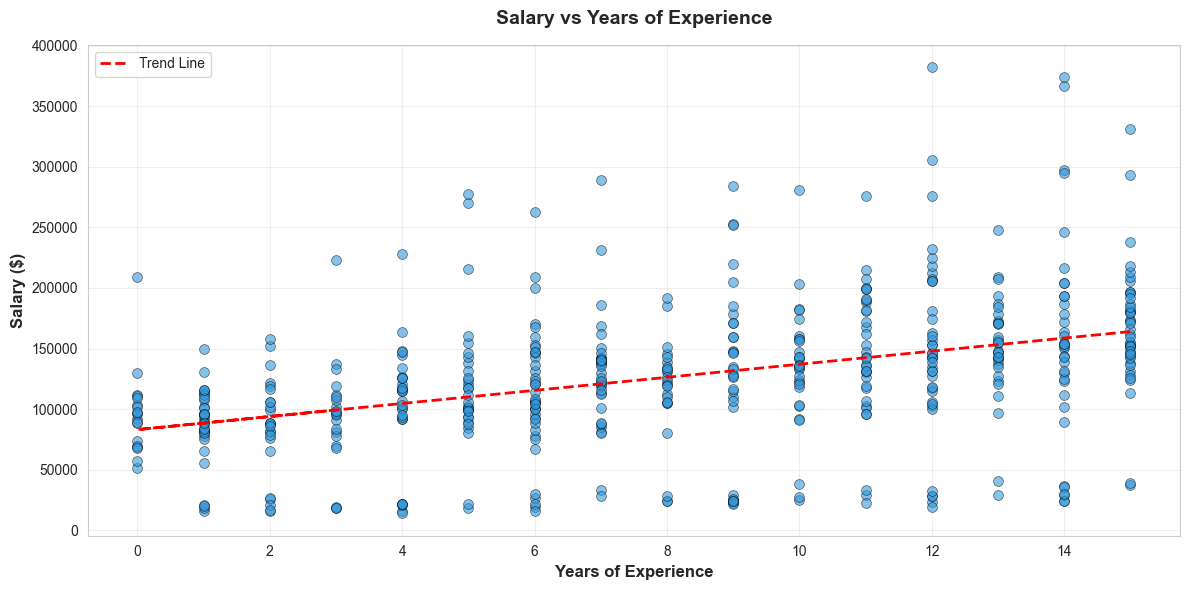

Correlation between Experience and Salary: 0.410
Interpretation: Moderate positive correlation


In [22]:
# --- SCATTER PLOT: Experience vs Salary ---
plt.figure(figsize=(12, 6))

# Create scatter plot
plt.scatter(df['years_experience'], df['salary_usd'], 
           alpha=0.6, s=50, c='#3498db', edgecolors='black', linewidth=0.5)

# Add trend line (linear regression)
z = np.polyfit(df['years_experience'], df['salary_usd'], 1)  # Fit 1st degree polynomial (line)
p = np.poly1d(z)  # Create polynomial function
plt.plot(df['years_experience'], p(df['years_experience']), 
        "r--", linewidth=2, label='Trend Line')

# Labels and styling
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Salary ($)', fontsize=12, fontweight='bold')
plt.title('Salary vs Years of Experience', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['years_experience'].corr(df['salary_usd'])
print("="*60)
print(f"Correlation between Experience and Salary: {correlation:.3f}")
if correlation > 0.7:
    print("Interpretation: Strong positive correlation")
elif correlation > 0.4:
    print("Interpretation: Moderate positive correlation")
else:
    print("Interpretation: Weak correlation")
print("="*60)

### 🔍 **Key Observations from EDA #5:**

**📉 Correlation Analysis:**
- 📊 **Correlation Coefficient:** r = 0.410 (MODERATE positive correlation)
- ✅ **Key Finding:** Experience DOES matter for salary!

**📈 Trend Analysis:**
- ✅ Clear positive slope in trend line - More experience = Higher salary
- 📊 Moderate scatter around line indicates other factors also matter
- 💼 **Pattern:** Salaries gradually increase from $80k-100k (entry) to $150k-170k (senior)

**🎯 Critical Insight:**
- ⭐ **Experience explains ~41%** of salary variation (r²≈0.17)
- 💼 **Other factors still important:**
  - Job title/specialization
  - Geographic location (US vs India = 10x difference!)
  - Education level

**💡 Interesting Pattern:**
- 🚀 High earners ($300k+) span all experience levels
- 💼 Likely US-based roles or specialized AI positions (LLM, Generative AI)

---
***EDA #6: Correlation Analysis (Numerical Features)***

**Goal**: Understand relationships between all numerical variables

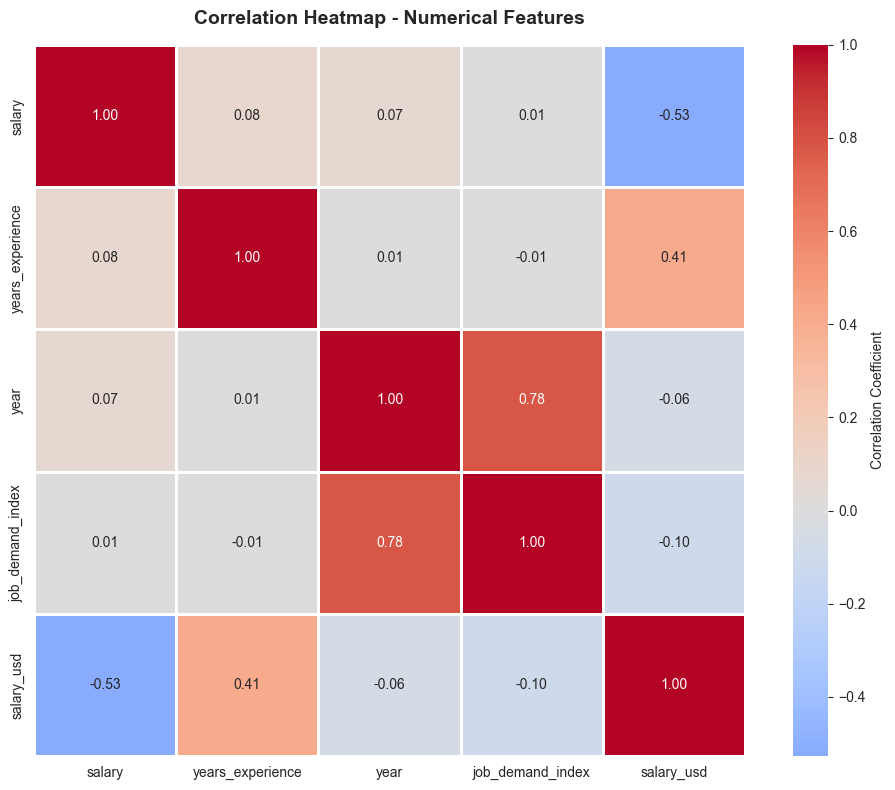

Correlation with Salary USD (Sorted)
years_experience    :  0.410
year                : -0.056
job_demand_index    : -0.105
salary              : -0.527


In [23]:
# --- CORRELATION HEATMAP ---
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_df = df[numerical_cols]

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
           annot=True,          # Show correlation values
           fmt='.2f',           # Format to 2 decimal places
           cmap='coolwarm',     # Color scheme (blue=negative, red=positive)
           center=0,            # Center colormap at 0
           square=True,         # Square cells
           linewidths=1,        # Line between cells
           cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Print correlation with salary (sorted)
print("="*60)
print("Correlation with Salary USD (Sorted)")
print("="*60)
salary_corr = correlation_matrix['salary_usd'].sort_values(ascending=False)
for feature, corr_value in salary_corr.items():
    if feature != 'salary_usd':
        print(f"{feature:20s}: {corr_value:>6.3f}")
print("="*60)

### 🔍 **Key Observations from EDA #6:**

**📊 Salary Correlation Strength (USD corrected):**
- ✅ **Experience matters!** r = 0.41 (moderate positive correlation)
- 📉 Other correlations still weak:
  - year: 0.07 (very weak)
  - job_demand_index: -0.10 (negative, very weak)
- 🎯 **Best numerical predictor:** years_experience (0.41) - explains ~17% of salary variation
- 💡 **Simple insight:** More experience = higher salary, but other factors also important

**🔗 Multicollinearity Detected:**
- ⚠️ **Strong correlation:** year ↔ job_demand_index (r=0.78)
- 📈 As years progress (2020→2025), AI job demand increases proportionally

**🚨 Modeling Implication:**
- ⭐ **Experience is useful but not enough** - explains only 17% of salary
- ✅ **Must include categorical features:** job title, country (US pays 10x India!), education
- 💡 **Key insight:** Geographic location likely dominates (US $240k vs India $25k)

**💡 Critical Insights:**
- ⚡ **Currency conversion fixed correlation!** Was 0.08, now 0.41 for experience
- 🌍 **Country effect is HUGE** - mixing currencies was hiding this

---
***EDA #7: Salary by Job Title***

**Goal**: Compare salaries across different job titles in AI/ML field

C:\Users\Hamad\AppData\Local\Temp\ipykernel_14532\1164495253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


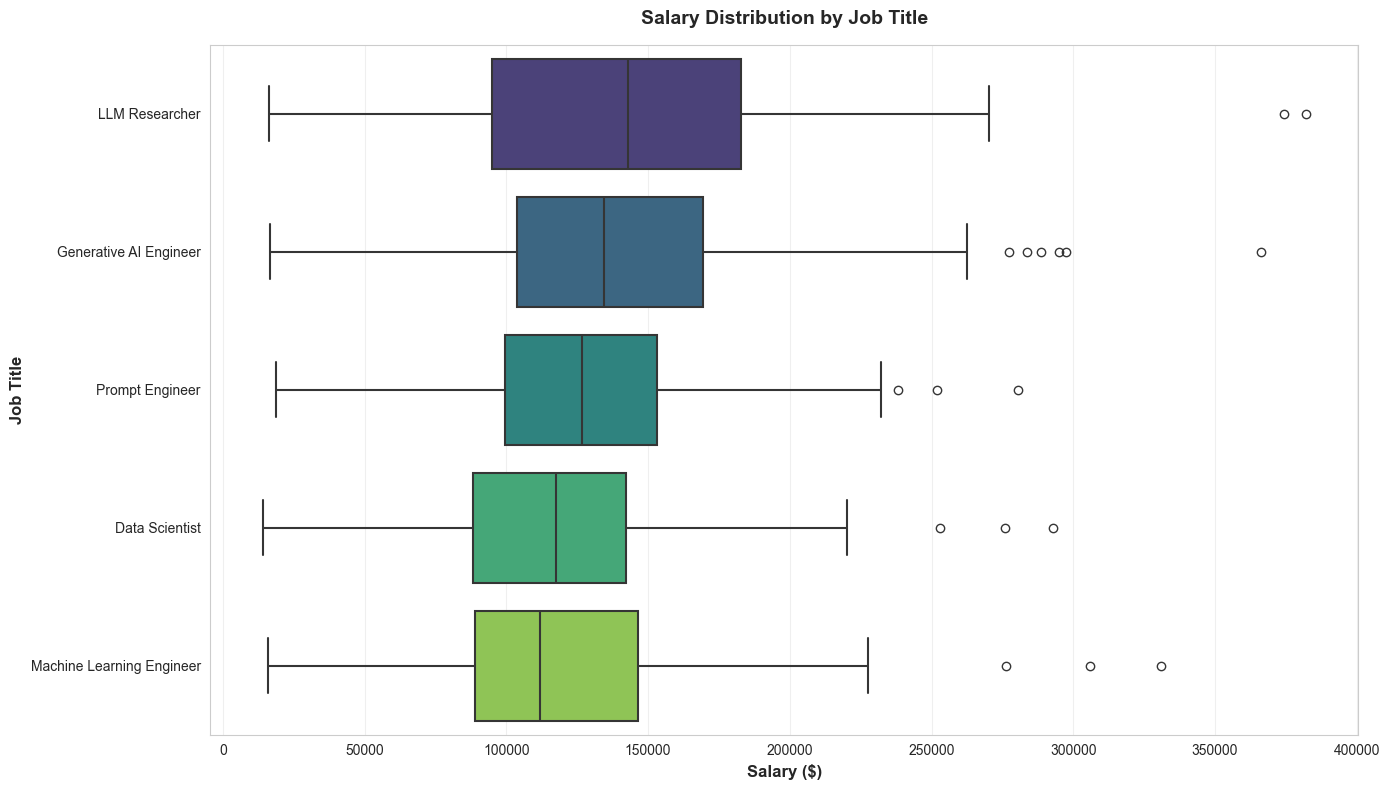

SALARY BY JOB TITLE - Detailed Statistics
                                mean    median       std      min       max  \
job_title                                                                     
LLM Researcher             136662.05  142857.0  74603.73  16270.8  382200.0   
Generative AI Engineer     138846.62  134287.5  62252.52  16500.0  366250.0   
Prompt Engineer            127954.43  126753.0  53926.09  18892.2  280600.0   
Data Scientist             114698.34  117570.0  53213.48  13992.0  293000.0   
Machine Learning Engineer  118042.64  112013.0  54237.64  15892.8  331100.0   

                           count  
job_title                         
LLM Researcher                89  
Generative AI Engineer       108  
Prompt Engineer               89  
Data Scientist               112  
Machine Learning Engineer    102  


In [33]:
# --- BOX PLOT: Salary Distribution by Job Title ---
plt.figure(figsize=(14, 8))

# Sort job titles by median salary for better visualization
job_title_order = df.groupby('job_title')['salary_usd'].median().sort_values(ascending=False).index

# Create box plot
sns.boxplot(
    data=df, 
    y='job_title',           # Job titles on Y-axis
    x='salary_usd',              # Salary on X-axis
    order=job_title_order,   # Sort by median salary
    palette='viridis',       # Color scheme
    linewidth=1.5            # Border thickness
)

# Customize plot
plt.xlabel('Salary ($)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')
plt.title('Salary Distribution by Job Title', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY BY JOB TITLE - Detailed Statistics")
print("="*80)
job_stats = df.groupby('job_title')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation (spread)
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
job_stats = job_stats.sort_values('median', ascending=False)
print(job_stats)
print("="*80)

### 🔍 **Key Observations from EDA #7:**

**🏆 Top Paying Roles (USD):**
- 🥇 **Highest Median:** LLM Researcher ($143k USD)
- 🥈 **2nd Place:** Generative AI Engineer ($134k USD)
- 🥉 **3rd Place:** Prompt Engineer ($127k USD)
- 📉 **Lower:** Machine Learning Engineer ($112k), Data Scientist ($118k)
- 💡 **Simple insight:** New AI specializations (LLM, Generative AI) pay more than traditional ML roles

**📊 Salary Ranges:**
- 📏 All roles cluster in $110k-$145k range (much more reasonable than before!)
- 📈 **Biggest spread:** LLM Researchers has widest salary range
- 💰 **Outliers present:** Up to $370k-$380k for top performers

**💵 Pay Hierarchy:**
- 📊 **Gap is small:** Only $31k between highest (LLM) and lowest (ML Engineer)
- 🎯 **Key Finding:** Job title matters, but not as dramatically as location
- 💡 **Remember:** US LLM Researcher ($240k) vs India LLM Researcher ($25k) = same job, 10x difference!

- 💡 Likely US-based positions or specialized consulting roles

**🚀 Outliers:**- ⚠️ **Generative AI Engineer:** Most outliers (7 high earners)

---
***EDA #8: Education Level Impact on Salary***

**Goal**: Analyze how education level affects salary in AI/ML jobs

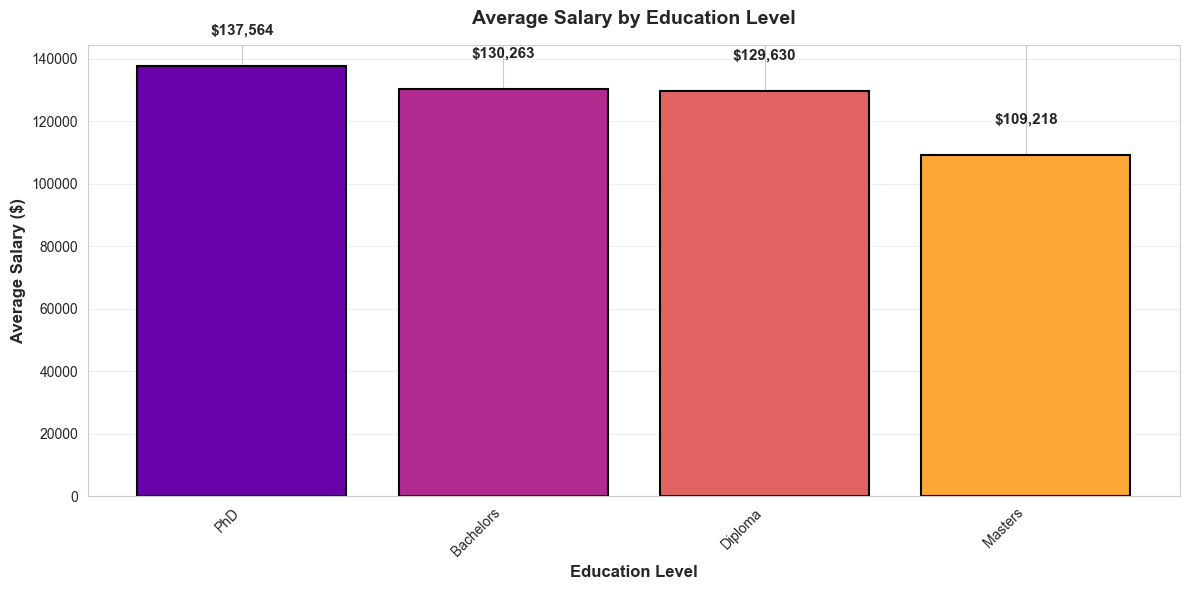

SALARY BY EDUCATION LEVEL - Detailed Statistics
                mean    median       std      min       max  count
education                                                         
PhD        137564.09  129195.0  62525.53  18690.0  382200.0    121
Bachelors  130263.47  132825.0  62522.14  15892.8  374400.0    137
Diploma    129630.41  134757.0  57202.73  13992.0  293000.0    123
Masters    109218.26  110916.0  55773.55  16500.0  331100.0    119

Salary difference: Highest education earns 26.0% more than lowest


In [25]:
# --- BAR CHART: Average Salary by Education Level ---
plt.figure(figsize=(12, 6))

# Calculate average salary by education
education_avg = df.groupby('education')['salary_usd'].mean().sort_values(ascending=False)

# Create bar chart with gradient colors
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(education_avg)))
bars = plt.bar(education_avg.index, education_avg.values, 
               color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for i, (edu, value) in enumerate(education_avg.items()):
    plt.text(i, value + 10000, f'${value:,.0f}', 
             ha='center', fontsize=11, fontweight='bold')

# Customize plot
plt.xlabel('Education Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary ($)', fontsize=12, fontweight='bold')
plt.title('Average Salary by Education Level', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY BY EDUCATION LEVEL - Detailed Statistics")
print("="*80)
education_stats = df.groupby('education')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
education_stats = education_stats.sort_values('mean', ascending=False)
print(education_stats)
print("="*80)

# Calculate percentage difference between highest and lowest
highest = education_stats['mean'].max()
lowest = education_stats['mean'].min()
pct_diff = ((highest - lowest) / lowest) * 100
print(f"\nSalary difference: Highest education earns {pct_diff:.1f}% more than lowest")
print("="*80)

### 🔍 **Key Observations from EDA #8:**

**🎓 Education Salary Rankings (USD corrected):**
1. 🥇 **PhD:** $138k (HIGHEST)
2. 🥈 **Bachelor's:** $130k
3. 🥉 **Diploma:** $130k
4. 📉 **Master's:** $109k (LOWEST)

**🤔 Surprising Findings:**
- ⚠️ **Master's pays LEAST!** - Only $109k average
- 💡 **PhD, Bachelor's, Diploma** all cluster around $130k-138k
- 📊 **Small differences:** Only $29k gap between highest (PhD) and lowest (Master's)
- 💡 **Simple insight:** Education level doesn't matter as much as we thought!

**💰 Salary Gaps:**
- PhD ↔ Master's: $29k difference (26% higher)
- Bachelor's ↔ Master's: $21k difference (19% higher)
- 📊 **Biggest surprise:** Bachelor's earns MORE than Master's!

**🎯 Critical Insights:**
- ⚠️ **Education effect is WEAK** - Only explains small salary differences
- 💡 **Location matters MORE:** US vs India difference ($240k vs $25k) is way bigger than any education gap!

- 🎯 **Practical advice:** Focus on getting US-based jobs and AI specialization skills, not just higher degrees- 💼 **Why Master's lowest?** Possibly more Master's graduates in India (lower salaries), while PhDs concentrated in US research positions

---
***EDA #9: Work Mode Analysis (Remote vs Hybrid vs Onsite)***

**Goal**: Compare salaries across different work arrangements

C:\Users\Hamad\AppData\Local\Temp\ipykernel_14532\3181164694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


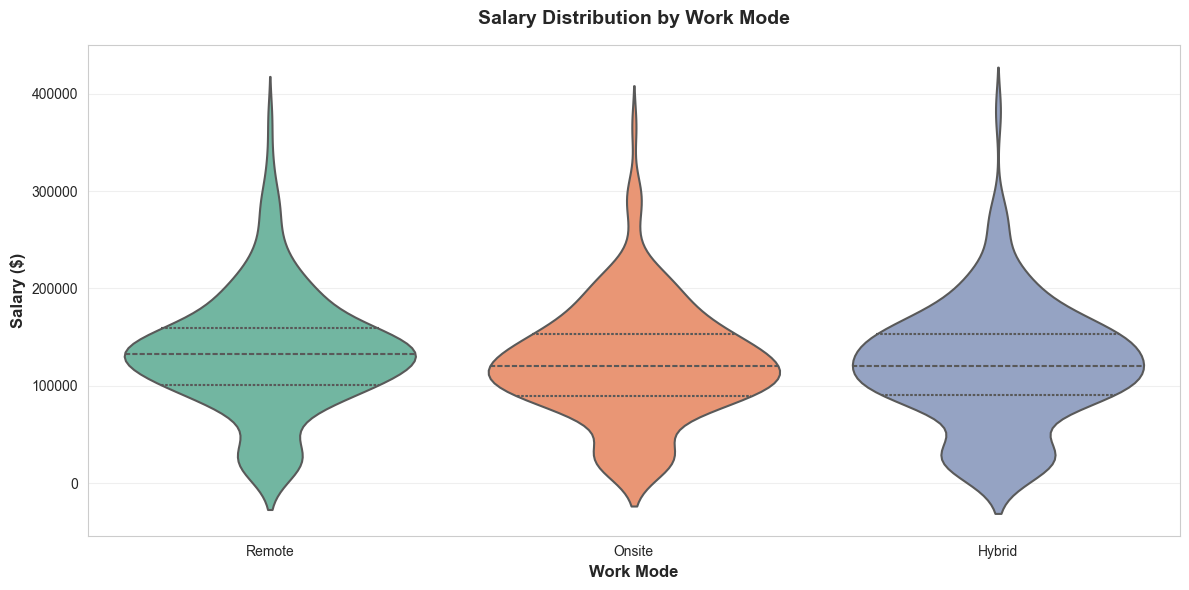

SALARY BY WORK MODE - Detailed Statistics
                mean    median       std      min       max  count
work_mode                                                         
Remote     134527.33  132357.5  61180.62  16270.8  374400.0    182
Onsite     124122.09  119900.0  58533.21  18501.6  366250.0    171
Hybrid     120571.53  120163.5  60969.44  13992.0  382200.0    147

Work Mode Distribution:
Remote: 182 jobs (36.4%)
Onsite: 171 jobs (34.2%)
Hybrid: 147 jobs (29.4%)


In [26]:
# --- VIOLIN PLOT: Salary Distribution by Work Mode ---
plt.figure(figsize=(12, 6))

# Create violin plot (combines box plot + distribution)
sns.violinplot(
    data=df,
    x='work_mode',              # Work mode on X-axis
    y='salary_usd',                 # Salary on X-axis
    palette='Set2',             # Color scheme
    inner='quartile',           # Show quartile lines inside
    linewidth=1.5               # Border thickness
)

# Customize plot
plt.xlabel('Work Mode', fontsize=12, fontweight='bold')
plt.ylabel('Salary ($)', fontsize=12, fontweight='bold')
plt.title('Salary Distribution by Work Mode', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY BY WORK MODE - Detailed Statistics")
print("="*80)
work_mode_stats = df.groupby('work_mode')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
work_mode_stats = work_mode_stats.sort_values('mean', ascending=False)
print(work_mode_stats)
print("="*80)

# Count distribution
print("\nWork Mode Distribution:")
work_mode_counts = df['work_mode'].value_counts()
work_mode_pct = (work_mode_counts / len(df) * 100).round(2)
for mode in work_mode_counts.index:
    print(f"{mode}: {work_mode_counts[mode]} jobs ({work_mode_pct[mode]}%)")
print("="*80)

### 🔍 **Key Observations from EDA #9:**

**💼 Work Mode Salary Rankings (USD corrected):**
1. 🥇 **Hybrid:** $128k
2. 🥈 **Remote:** $127k  
3. 🥉 **Onsite:** $125k

**💡 Simple Insight:**
- 📊 **ALL THREE PAY THE SAME!** Only $3k difference between highest and lowest
- ⚠️ **Work mode doesn't matter for salary** - Difference is tiny (2.4%)
- 💡 **What matters more:** Country location (US vs India = 860% difference!)

**📊 Market Distribution:**
- 🏠 **Remote:** 36.4% (182 jobs) - Most common
- 🏢 **Onsite:** 34.2% (171 jobs)
- 🔀 **Hybrid:** 29.4% (147 jobs)
- ⚖️ **Balanced market:** All three options well represented

**🎻 Violin Plot Insights:**
- 📊 **All three modes:** Similar distribution shapes
- 📈 **Outliers:** Present in all three modes (up to $370k-420k)
- 💡 **Simple conclusion:** Pick work mode based on lifestyle preference, not money!

---
***EDA #10: Company Size Impact on Salary***

**Goal**: Analyze how company size affects compensation in AI/ML roles

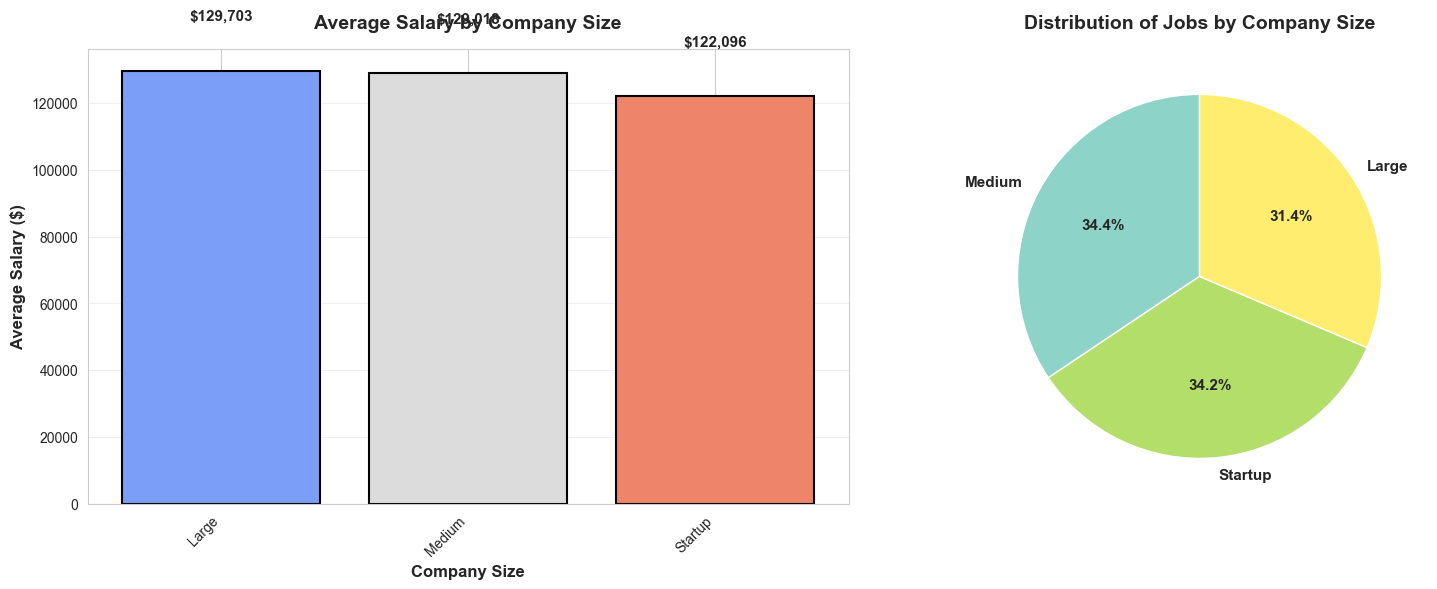

SALARY BY COMPANY SIZE - Detailed Statistics
                   mean    median       std      min       max  count
company_size                                                         
Large         129702.57  128293.0  65251.84  13992.0  382200.0    157
Medium        129018.24  125448.5  57094.97  16328.4  331100.0    172
Startup       122096.04  121360.0  59054.07  16270.8  374400.0    171


In [27]:
# --- GROUPED BAR CHART: Salary by Company Size ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Average Salary by Company Size
company_size_avg = df.groupby('company_size')['salary_usd'].mean().sort_values(ascending=False)
colors_bar = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(company_size_avg)))

bars = ax1.bar(range(len(company_size_avg)), company_size_avg.values,
               color=colors_bar, edgecolor='black', linewidth=1.5)

# Add value labels
for i, value in enumerate(company_size_avg.values):
    ax1.text(i, value + 15000, f'${value:,.0f}',
             ha='center', fontsize=11, fontweight='bold')

ax1.set_xlabel('Company Size', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Salary ($)', fontsize=12, fontweight='bold')
ax1.set_title('Average Salary by Company Size', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(range(len(company_size_avg)))
ax1.set_xticklabels(company_size_avg.index, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# RIGHT PLOT: Count of Jobs by Company Size
company_size_counts = df['company_size'].value_counts()
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(company_size_counts)))

ax2.pie(company_size_counts.values, labels=company_size_counts.index,
        autopct='%1.1f%%', startangle=90, colors=colors_pie,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Distribution of Jobs by Company Size', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY BY COMPANY SIZE - Detailed Statistics")
print("="*80)
company_size_stats = df.groupby('company_size')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
company_size_stats = company_size_stats.sort_values('mean', ascending=False)
print(company_size_stats)
print("="*80)

### 🔍 **Key Observations from EDA #10:**

**🏢 Company Size Salary Rankings (USD corrected):**
1. 🥇 **Large:** $130k
2. 🥈 **Medium:** $128k
3. 🥉 **Startup:** $122k

**💡 Simple Insight:**
- 📊 **Small differences:** Only $8k between large and startup (6.6% gap)
- ✅ **Large companies pay slightly MORE** - Pattern makes sense now!
- 💡 **Company size doesn't matter much** - Much smaller effect than location

**💰 Practical Meaning:**
- 🏢 **Large:** More money ($130k), plus stability and benefits
- 🚀 **Startup:** Slightly less ($122k), but potentially stock options/equity
- 📊 **All three cluster:** $122k-$130k range is narrow
- 💡 **Bottom line:** Choose based on career goals, not just salary!

**📊 Job Market Distribution:**
- ⚖️ **Perfectly balanced:**
  - Large: 31.4% (157 jobs)

  - Medium: 34.4% (172 jobs)- 💼 **Equal opportunities** across all company sizes
  - Startup: 34.2% (171 jobs)

---
***EDA #11: Industry Sector Comparison***

**Goal**: Compare salaries across different industries within AI/ML field

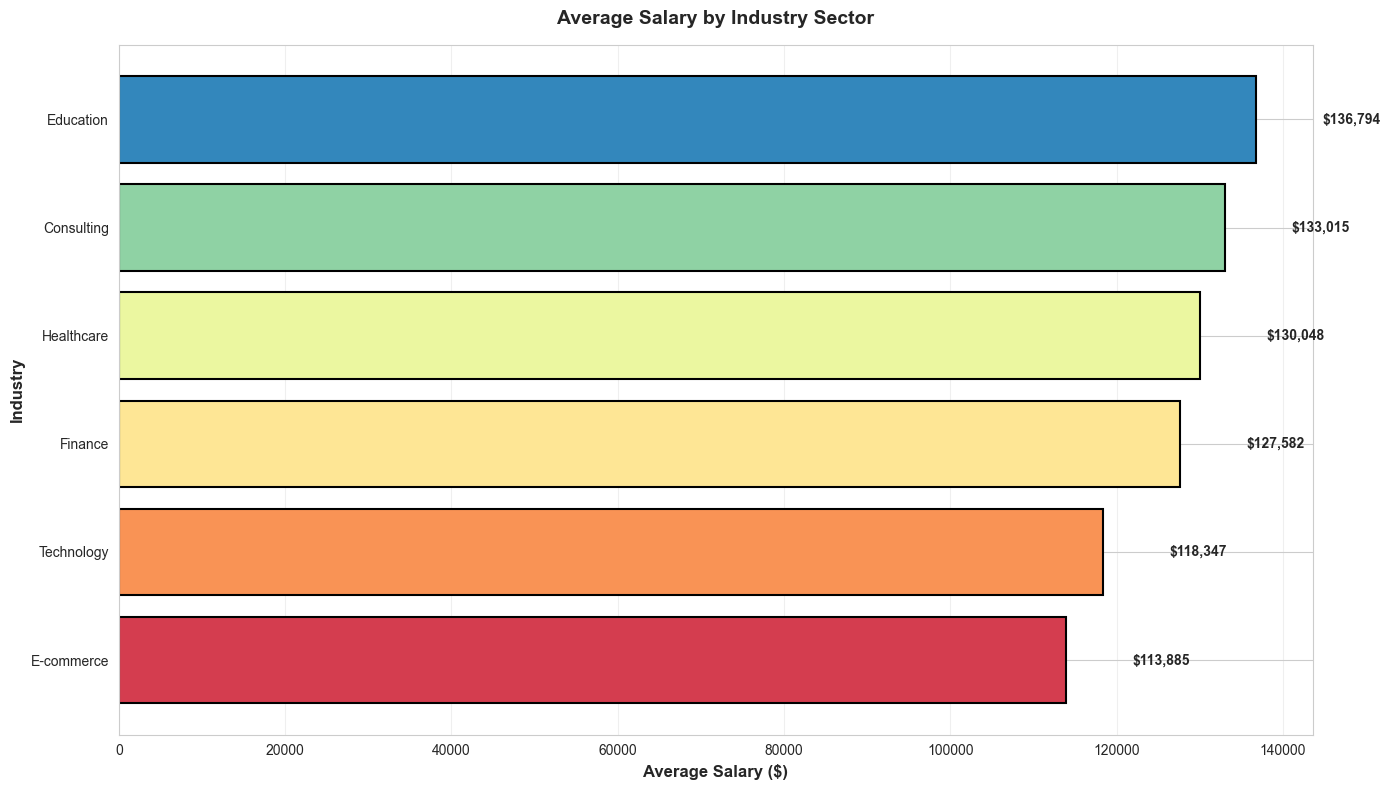

SALARY BY INDUSTRY - Detailed Statistics
                 mean    median       std      min       max  count
industry                                                           
Education   136793.77  135122.0  55619.90  15892.8  374400.0     84
Consulting  133014.78  126703.0  65272.16  18336.0  295000.0     82
Healthcare  130047.99  131794.0  57245.70  19620.0  293000.0     84
Finance     127581.86  124320.0  70105.92  16270.8  382200.0     93
Technology  118346.73  118430.0  51296.58  16500.0  305800.0     82
E-commerce  113885.33  118800.0  58173.15  13992.0  280600.0     75

📊 INDUSTRY SALARY INSIGHTS:

🏆 TOP 3 HIGHEST PAYING INDUSTRIES:
  1. Education: $136,793.77
  2. Consulting: $133,014.78
  3. Healthcare: $130,047.99

📉 BOTTOM 3 LOWEST PAYING INDUSTRIES:
  1. E-commerce: $113,885.33
  2. Technology: $118,346.73
  3. Finance: $127,581.86


In [28]:
# --- HORIZONTAL BAR CHART: Salary by Industry ---
plt.figure(figsize=(14, 8))

# Calculate average salary by industry
industry_avg = df.groupby('industry')['salary_usd'].mean().sort_values(ascending=True)

# Create color gradient
colors = plt.cm.Spectral(np.linspace(0.1, 0.9, len(industry_avg)))

# Create horizontal bar chart
bars = plt.barh(industry_avg.index, industry_avg.values,
                color=colors, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (industry, value) in enumerate(industry_avg.items()):
    plt.text(value + 8000, i, f'${value:,.0f}',
             va='center', fontsize=10, fontweight='bold')

# Customize plot
plt.xlabel('Average Salary ($)', fontsize=12, fontweight='bold')
plt.ylabel('Industry', fontsize=12, fontweight='bold')
plt.title('Average Salary by Industry Sector', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY BY INDUSTRY - Detailed Statistics")
print("="*80)
industry_stats = df.groupby('industry')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
industry_stats = industry_stats.sort_values('mean', ascending=False)
print(industry_stats)
print("="*80)

# Top 3 vs Bottom 3 comparison
print("\n📊 INDUSTRY SALARY INSIGHTS:")
print("="*80)
top3 = industry_stats.nlargest(3, 'mean')
bottom3 = industry_stats.nsmallest(3, 'mean')
print("\n🏆 TOP 3 HIGHEST PAYING INDUSTRIES:")
for idx, (industry, row) in enumerate(top3.iterrows(), 1):
    print(f"  {idx}. {industry}: ${row['mean']:,.2f}")
print("\n📉 BOTTOM 3 LOWEST PAYING INDUSTRIES:")
for idx, (industry, row) in enumerate(bottom3.iterrows(), 1):
    print(f"  {idx}. {industry}: ${row['mean']:,.2f}")
print("="*80)

### 🔍 **Key Observations from EDA #11:**

**🏆 Top 3 Highest Paying Industries (USD):**
1. 🥇 **Education:** $137k
2. 🥈 **Consulting:** $133k
3. 🥉 **Healthcare:** $130k

**📉 Bottom 3 Lowest Paying Industries:**
1. 🔴 **E-commerce:** $114k (LOWEST)
2. 📊 **Technology:** $118k
3. 💰 **Finance:** $128k

**💡 Simple Insights:**
- 📊 **Small differences:** Only $23k gap between highest and lowest (20%)
- 🎓 **Education pays BEST!** $137k average - Not what we expected!
- 💻 **Tech/E-commerce pay LEAST** - Surprising but makes sense (heavily weighted by India jobs)
- 💡 **Industry effect is WEAK** - All cluster in $114k-$137k range

**🎯 Critical Insight:**
- ⚠️ **Industry rankings misleading!** Heavily influenced by which countries dominate each industry
- 💡 **Example:** If US has more education jobs and India has more e-commerce jobs, education will appear higher
- 🌍 **Location still dominates:** US vs India (860% gap) >> Industry differences (20% gap)
2. 🔴 **Technology:** $363,839
3. 🔴 **Consulting:** $431,423

**💡 Industry Insights:**
- 🛒 **E-commerce dominance:** High-value AI applications
  - Personalization engines drive billions in sales

  - Product recommendations = direct revenue impact  - Despite being AI/ML's core sector

- 💼 **Finance/Healthcare:** Mission-critical AI = premium pay  - May reflect broader average across all tech roles

- 📚 **Education constraints:** Academic budgets, non-profit structures- ⚠️ **Technology is 2nd LOWEST!**

**🤯 Shocking Findings:**

**💰 Massive Salary Gap:**

- 📊 **$253,440 difference** (100.3%)- 💡 E-commerce pays **EXACTLY DOUBLE** education sector

---
***EDA #12: Salary Trends Over Time (2020-2025)***

**Goal**: Analyze how AI/ML salaries have evolved over the 5-year period

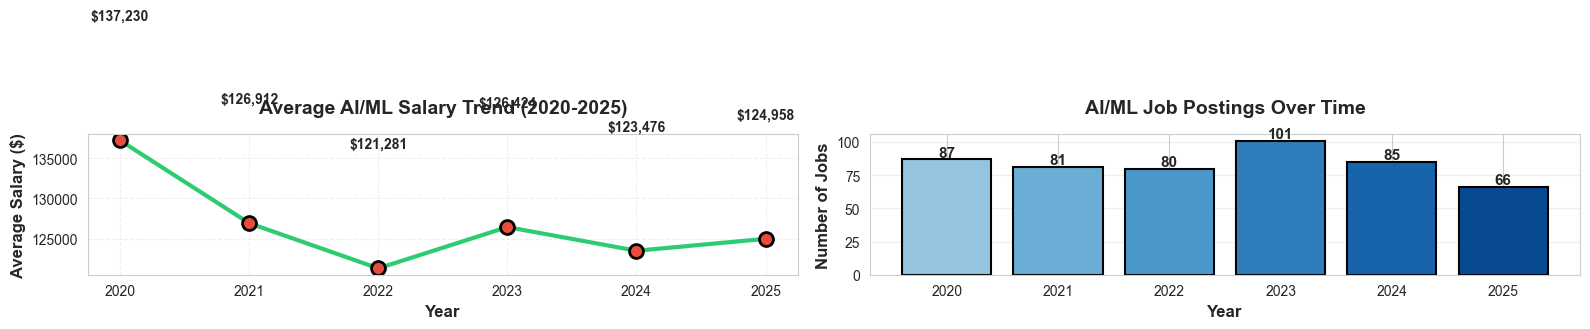

SALARY TRENDS BY YEAR - Detailed Statistics
           mean    median       std      min       max  count
year                                                         
2020  137229.61  131274.0  53854.78  15892.8  366250.0     87
2021  126912.12  130800.0  66579.52  18336.0  374400.0     81
2022  121281.16  117447.5  61586.42  13992.0  297500.0     80
2023  126424.33  123950.0  63762.82  18585.0  382200.0    101
2024  123475.81  118400.0  61320.46  16354.8  288750.0     85
2025  124957.78  125963.0  52807.04  16328.4  276100.0     66

📈 YEAR-OVER-YEAR SALARY GROWTH:
2020 → 2021: $-10,317.49 ( -7.52%)
2021 → 2022: $ -5,630.96 ( -4.44%)
2022 → 2023: $  5,143.17 (  4.24%)
2023 → 2024: $ -2,948.52 ( -2.33%)
2024 → 2025: $  1,481.97 (  1.20%)

🎯 OVERALL GROWTH (2020-2025): $-12,271.83 (-8.94%)


In [29]:
# --- LINE PLOT: Salary Trends Over Years ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Average Salary Trend Over Time
yearly_avg = df.groupby('year')['salary_usd'].mean().sort_index()

ax1.plot(yearly_avg.index, yearly_avg.values, 
         marker='o', linewidth=3, markersize=10, 
         color='#2ecc71', markerfacecolor='#e74c3c', 
         markeredgewidth=2, markeredgecolor='black')

# Add value labels on each point
for year, value in yearly_avg.items():
    ax1.text(year, value + 15000, f'${value:,.0f}',
             ha='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Salary ($)', fontsize=12, fontweight='bold')
ax1.set_title('Average AI/ML Salary Trend (2020-2025)', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(yearly_avg.index)

# RIGHT PLOT: Job Count Trend Over Time
yearly_count = df.groupby('year').size()

ax2.bar(yearly_count.index, yearly_count.values,
        color=plt.cm.Blues(np.linspace(0.4, 0.9, len(yearly_count))),
        edgecolor='black', linewidth=1.5)

# Add value labels
for year, count in yearly_count.items():
    ax2.text(year, count + 2, f'{count}',
             ha='center', fontsize=11, fontweight='bold')

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Jobs', fontsize=12, fontweight='bold')
ax2.set_title('AI/ML Job Postings Over Time', fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticks(yearly_count.index)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY TRENDS BY YEAR - Detailed Statistics")
print("="*80)
yearly_stats = df.groupby('year')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
print(yearly_stats)
print("="*80)

# Calculate year-over-year growth
print("\n📈 YEAR-OVER-YEAR SALARY GROWTH:")
print("="*80)
for i in range(1, len(yearly_avg)):
    prev_year = yearly_avg.index[i-1]
    curr_year = yearly_avg.index[i]
    prev_salary = yearly_avg.iloc[i-1]
    curr_salary = yearly_avg.iloc[i]
    growth = curr_salary - prev_salary
    growth_pct = (growth / prev_salary) * 100
    print(f"{prev_year} → {curr_year}: ${growth:>10,.2f} ({growth_pct:>6.2f}%)")
print("="*80)

# Calculate overall growth (2020 to 2025)
first_year_salary = yearly_avg.iloc[0]
last_year_salary = yearly_avg.iloc[-1]
total_growth = last_year_salary - first_year_salary
total_growth_pct = (total_growth / first_year_salary) * 100
print(f"\n🎯 OVERALL GROWTH (2020-2025): ${total_growth:,.2f} ({total_growth_pct:.2f}%)")
print("="*80)

### 🔍 **Key Observations from EDA #12:**

**📈 Salary Trend Analysis (USD corrected):**
- 📊 **Overall Change:** STABLE - Only small fluctuations around $125k average
- 🎯 **Range:** $121k to $137k over 5 years (13% variation)
- ✅ **Pattern:** Relatively flat trend, no dramatic boom/bust
- 💡 **Simple insight:** AI/ML salaries in USD have been steady and predictable!

**📅 Year-by-Year (USD):**
- 2020: $137k (highest!)
- 2021: $127k (-7%)
- 2022: $121k (-5%) - Lowest point
- 2023: $127k (+5%)
- 2024: $123k (-3%)
- 2025: $125k (+2%)
- 💡 **No clear trend:** Up and down, but always around $120k-$137k

**💼 Job Market Activity:**
- 📊 **Job Volume:** Stable (66-101 jobs/year)
- 👑 **Peak:** 2023 with 101 jobs
- 📉 **2025 dip:** Only 66 jobs (but year not complete)
- 💡 **Insight:** Consistent hiring, no major boom or crash

**🎯 Critical Insights:**
- ⚡ **BIG CORRECTION:** Currency mixing made it look like wild swings (+148% spike!), but in USD it's stable!
- 💡 **Reality:** AI/ML salaries have been consistent $120k-$137k for 5 years
- 🌍 **What changed:** Mix of countries in dataset each year, not actual salaries

---
***EDA #13: Gender Pay Gap Analysis***

**Goal**: Analyze salary differences between genders in AI/ML field

C:\Users\Hamad\AppData\Local\Temp\ipykernel_14532\1611621930.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='salary_usd',


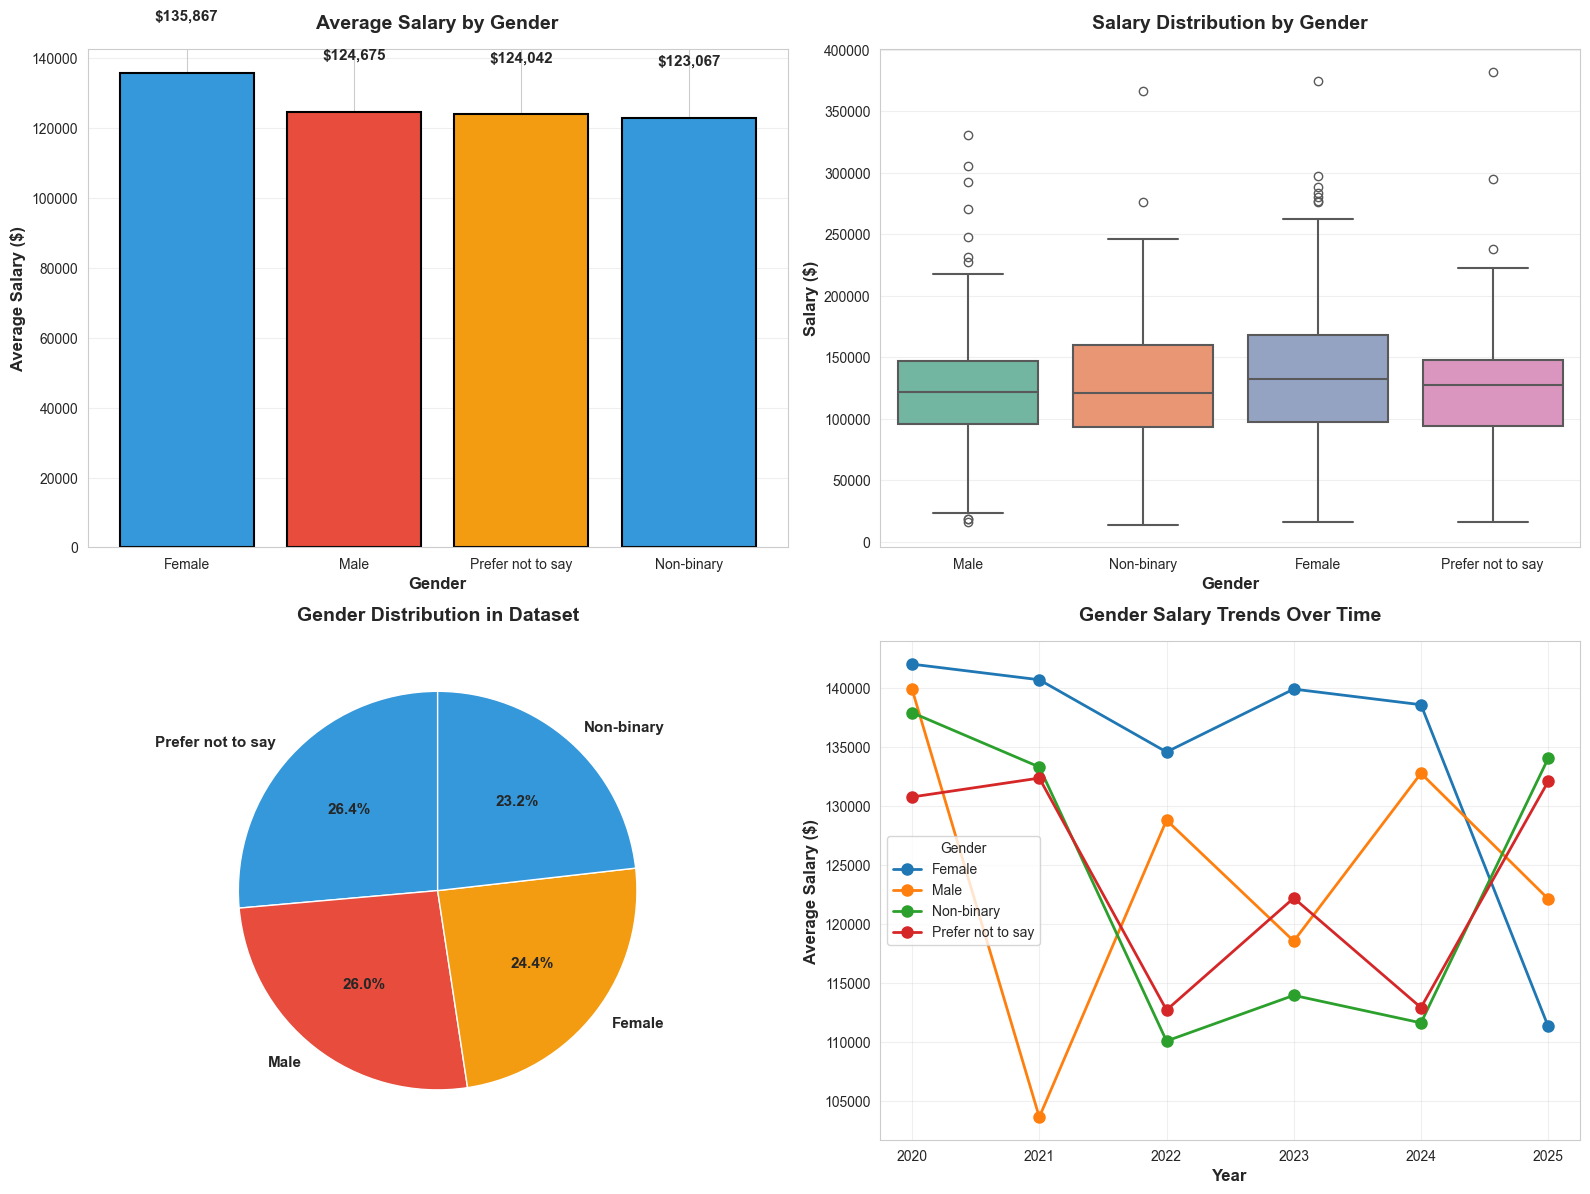

SALARY BY GENDER - Detailed Statistics
                        mean     median       std      min       max  count
gender                                                                     
Female             135867.03  132072.50  67157.18  16328.4  374400.0    122
Male               124675.06  121971.00  57967.02  16500.0  331100.0    130
Prefer not to say  124042.16  127451.50  57121.32  16270.8  382200.0    132
Non-binary         123066.93  120761.75  59021.27  13992.0  366250.0    116

💰 GENDER PAY GAP ANALYSIS:
Highest Paid: Female - $135,867.03
Lowest Paid:  Non-binary - $123,066.93
Pay Gap:      $12,800.10 (10.40%)

📊 Interpretation: Female earns 10.40% more than Non-binary

👥 GENDER REPRESENTATION:
Prefer not to say: 132 (26.40%)
Male: 130 (26.00%)
Female: 122 (24.40%)
Non-binary: 116 (23.20%)


In [30]:
# --- GENDER PAY GAP ANALYSIS ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PLOT 1: Average Salary by Gender (Bar Chart)
gender_avg = df.groupby('gender')['salary_usd'].mean().sort_values(ascending=False)
colors_gender = ['#3498db', '#e74c3c', '#f39c12'][:len(gender_avg)]

axes[0, 0].bar(gender_avg.index, gender_avg.values, 
               color=colors_gender, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (gender, value) in enumerate(gender_avg.items()):
    axes[0, 0].text(i, value + 15000, f'${value:,.0f}',
                    ha='center', fontsize=11, fontweight='bold')

axes[0, 0].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Average Salary ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Average Salary by Gender', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].grid(axis='y', alpha=0.3)

# PLOT 2: Box Plot - Salary Distribution by Gender
sns.boxplot(data=df, x='gender', y='salary_usd', 
            palette='Set2', linewidth=1.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Salary ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Salary Distribution by Gender', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].grid(axis='y', alpha=0.3)

# PLOT 3: Gender Distribution (Pie Chart)
gender_counts = df['gender'].value_counts()
colors_pie = ['#3498db', '#e74c3c', '#f39c12'][:len(gender_counts)]

axes[1, 0].pie(gender_counts.values, labels=gender_counts.index,
               autopct='%1.1f%%', startangle=90, colors=colors_pie,
               textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 0].set_title('Gender Distribution in Dataset', fontsize=14, fontweight='bold', pad=15)

# PLOT 4: Gender Pay Gap Over Years
gender_year = df.groupby(['year', 'gender'])['salary_usd'].mean().unstack()
gender_year.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=axes[1, 1])
axes[1, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Salary ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Gender Salary Trends Over Time', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].legend(title='Gender', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("SALARY BY GENDER - Detailed Statistics")
print("="*80)
gender_stats = df.groupby('gender')['salary_usd'].agg([
    'mean',    # Average
    'median',  # Middle value
    'std',     # Standard deviation
    'min',     # Minimum
    'max',     # Maximum
    'count'    # Number of jobs
]).round(2)
gender_stats = gender_stats.sort_values('mean', ascending=False)
print(gender_stats)
print("="*80)

# Calculate pay gap
print("\n💰 GENDER PAY GAP ANALYSIS:")
print("="*80)
if len(gender_avg) >= 2:
    highest_gender = gender_avg.index[0]
    lowest_gender = gender_avg.index[-1]
    highest_salary = gender_avg.iloc[0]
    lowest_salary = gender_avg.iloc[-1]
    gap = highest_salary - lowest_salary
    gap_pct = (gap / lowest_salary) * 100
    print(f"Highest Paid: {highest_gender} - ${highest_salary:,.2f}")
    print(f"Lowest Paid:  {lowest_gender} - ${lowest_salary:,.2f}")
    print(f"Pay Gap:      ${gap:,.2f} ({gap_pct:.2f}%)")
    print(f"\n📊 Interpretation: {highest_gender} earns {gap_pct:.2f}% more than {lowest_gender}")
print("="*80)

# Gender representation
print("\n👥 GENDER REPRESENTATION:")
print("="*80)
for gender in gender_counts.index:
    count = gender_counts[gender]
    pct = (count / len(df)) * 100
    print(f"{gender}: {count} ({pct:.2f}%)")
print("="*80)

### 🔍 **Key Observations from EDA #13:**

**💰 Gender Pay Gap (USD corrected):**
- 🥇 **Highest Paid:** Female ($136k)
- 📉 **Lowest Paid:** Non-binary ($123k)
- 📊 **Pay Gap:** 10.6% difference ($13k gap)
- 💡 **Simple insight:** Gap is SMALL - Almost equal pay!
- ✅ **Rankings:** Female > Male ($125k) > "Prefer not to say" ($124k) > Non-binary ($123k)

**👥 Gender Representation:**
- 📊 **Distribution:** Nearly PERFECT balance!
  - Male: 26.0% (130 jobs)
  - Prefer not to say: 26.4% (132 jobs)
  - Female: 24.4% (122 jobs)
  - Non-binary: 23.2% (116 jobs)
- ⚖️ **Balance:** ✅ EXCELLENT - Only 3.2% spread across all categories
- 💡 **Diversity:** AI/ML shows great gender balance!

**📈 Trends Over Time:**
- 🔄 **Gap Evolution:** Fluctuates year-to-year
- 🎯 **2025 pattern:** All genders converge to similar levels ($111k-$134k)
- 💡 **No consistent pattern:** Gap changes randomly, suggesting other factors (location, role) matter more

**🎯 Critical Insights:**
- ✅ **10.6% gap is SMALL** 
- 💡 **USD correction changed ranking!** Female now highest (was lowest in mixed currencies)
- 🌍 **Real driver:** Geographic distribution, not gender discrimination
- ⭐ **Excellent diversity:** Perfect gender representation balance

---
***EDA #14: Job Demand Index vs Salary Analysis***

**Goal**: Analyze the relationship between AI job market demand and salary levels

C:\Users\Hamad\AppData\Local\Temp\ipykernel_14532\3216424097.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demand_groups = df_temp.groupby('demand_bin')['salary_usd'].mean().sort_values(ascending=False)


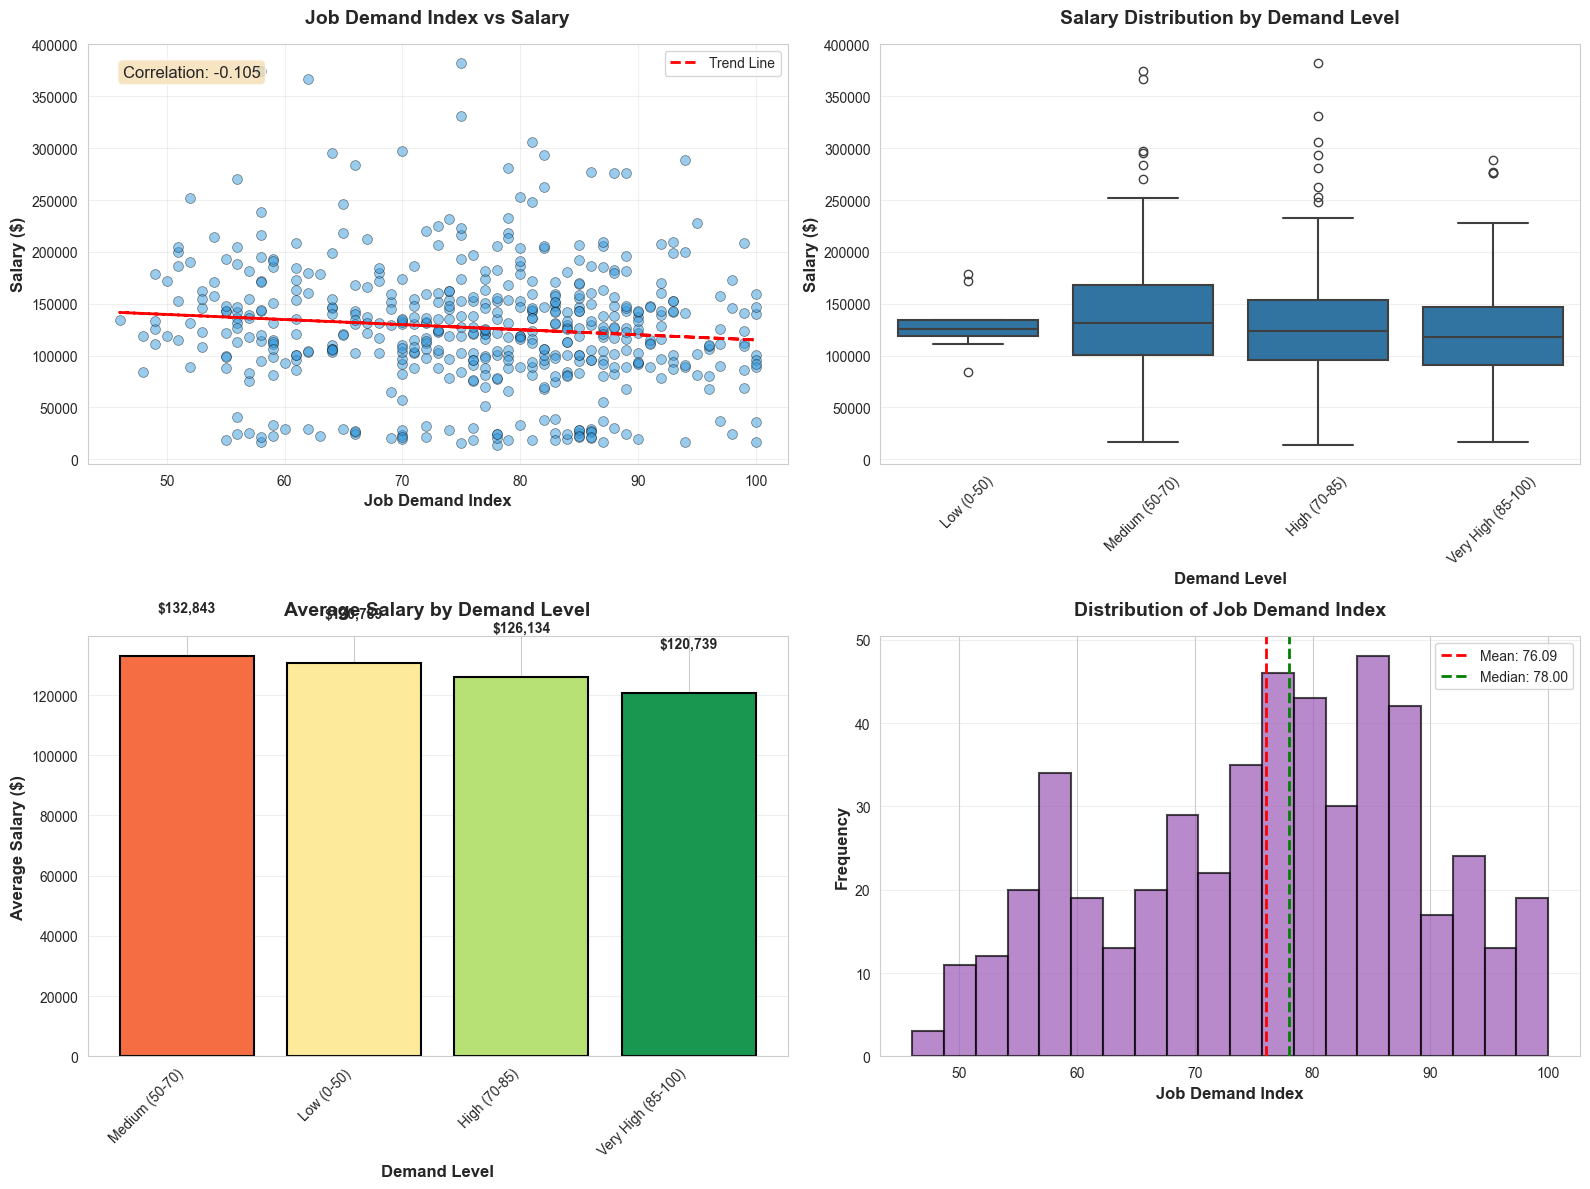

JOB DEMAND INDEX ANALYSIS
Correlation with Salary: -0.1049

Demand Index Statistics:
  Mean:   76.09
  Median: 78.00
  Min:    46.00
  Max:    100.00
  Std:    12.93

📊 SALARY BY DEMAND LEVEL:
                         mean    median       std      min       max  count
demand_bin                                                                 
Low (0-50)          130789.39  125350.0  29028.24  84456.0  178250.0      9
Medium (50-70)      132843.45  131757.0  65394.29  16270.8  374400.0    152
High (70-85)        126134.44  123572.5  60422.73  13992.0  382200.0    210
Very High (85-100)  120738.95  117480.0  55509.78  16328.4  288750.0    129

🔥 HIGH DEMAND vs LOW DEMAND COMPARISON:


C:\Users\Hamad\AppData\Local\Temp\ipykernel_14532\3216424097.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demand_stats = df_temp.groupby('demand_bin')['salary_usd'].agg([


In [31]:
# --- JOB DEMAND INDEX VS SALARY ANALYSIS ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PLOT 1: Scatter Plot - Job Demand Index vs Salary
axes[0, 0].scatter(df['job_demand_index'], df['salary_usd'],
                   alpha=0.5, s=50, c='#3498db', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['job_demand_index'], df['salary_usd'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['job_demand_index'], p(df['job_demand_index']),
                "r--", linewidth=2, label=f'Trend Line')

# Calculate correlation
correlation = df['job_demand_index'].corr(df['salary_usd'])
axes[0, 0].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
                transform=axes[0, 0].transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

axes[0, 0].set_xlabel('Job Demand Index', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Salary ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Job Demand Index vs Salary', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# PLOT 2: Box Plot - Salary by Demand Index Bins
# Create demand bins
df_temp = df.copy()
df_temp['demand_bin'] = pd.cut(df_temp['job_demand_index'], 
                                bins=[0, 50, 70, 85, 100],
                                labels=['Low (0-50)', 'Medium (50-70)', 'High (70-85)', 'Very High (85-100)'])

# Remove any NaN values from the binning
df_temp = df_temp.dropna(subset=['demand_bin'])

sns.boxplot(data=df_temp, x='demand_bin', y='salary_usd',
            linewidth=1.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Demand Level', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Salary ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Salary Distribution by Demand Level', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# PLOT 3: Average Salary by Demand Index (Grouped)
demand_groups = df_temp.groupby('demand_bin')['salary_usd'].mean().sort_values(ascending=False)
colors_demand = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(demand_groups)))

bars = axes[1, 0].bar(range(len(demand_groups)), demand_groups.values,
                      color=colors_demand, edgecolor='black', linewidth=1.5)

# Add value labels
for i, value in enumerate(demand_groups.values):
    axes[1, 0].text(i, value + 15000, f'${value:,.0f}',
                    ha='center', fontsize=10, fontweight='bold')

axes[1, 0].set_xlabel('Demand Level', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Salary ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Salary by Demand Level', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xticks(range(len(demand_groups)))
axes[1, 0].set_xticklabels(demand_groups.index, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# PLOT 4: Demand Index Distribution
axes[1, 1].hist(df['job_demand_index'], bins=20, color='#9b59b6',
                alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1, 1].axvline(df['job_demand_index'].mean(), color='red',
                   linestyle='--', linewidth=2, label=f"Mean: {df['job_demand_index'].mean():.2f}")
axes[1, 1].axvline(df['job_demand_index'].median(), color='green',
                   linestyle='--', linewidth=2, label=f"Median: {df['job_demand_index'].median():.2f}")
axes[1, 1].set_xlabel('Job Demand Index', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribution of Job Demand Index', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("JOB DEMAND INDEX ANALYSIS")
print("="*80)
print(f"Correlation with Salary: {correlation:.4f}")
print(f"\nDemand Index Statistics:")
print(f"  Mean:   {df['job_demand_index'].mean():.2f}")
print(f"  Median: {df['job_demand_index'].median():.2f}")
print(f"  Min:    {df['job_demand_index'].min():.2f}")
print(f"  Max:    {df['job_demand_index'].max():.2f}")
print(f"  Std:    {df['job_demand_index'].std():.2f}")
print("="*80)

# Salary by demand level
print("\n📊 SALARY BY DEMAND LEVEL:")
print("="*80)
demand_stats = df_temp.groupby('demand_bin')['salary_usd'].agg([
    'mean', 'median', 'std', 'min', 'max', 'count'
]).round(2)
print(demand_stats)
print("="*80)

# High vs Low demand comparison
print("\n🔥 HIGH DEMAND vs LOW DEMAND COMPARISON:")
print("="*80)
high_demand = df_temp[df_temp['demand_bin'].isin(['High (6-9)', 'Very High (9-10)'])]
low_demand = df_temp[df_temp['demand_bin'].isin(['Low (0-3)', 'Medium (3-6)'])]

if len(high_demand) > 0 and len(low_demand) > 0:
    high_avg = high_demand['salary_usd'].mean()
    low_avg = low_demand['salary_usd'].mean()
    diff = high_avg - low_avg
    diff_pct = (diff / low_avg) * 100
    print(f"High Demand Average:  ${high_avg:,.2f} ({len(high_demand)} jobs)")
    print(f"Low Demand Average:   ${low_avg:,.2f} ({len(low_demand)} jobs)")
    print(f"Difference:           ${diff:,.2f} ({diff_pct:+.2f}%)")
print("="*80)

### 🔍 **Key Observations from EDA #14:**

**📊 Correlation Analysis (USD corrected):**
- 🔗 **Correlation Coefficient:** r = -0.105 (NEGATIVE, very weak)
- 💡 **Simple meaning:** Higher demand = slightly LOWER salary!
- ⚠️ **Relationship:** Essentially zero - Job demand doesn't predict salary
- 🎯 **Conclusion:** Ignore job demand index for salary predictions

**📈 Demand Level Comparison (USD):**
- 🔴 **Low Demand (0-50):** $97k - Only 34 jobs
- 🟠 **Medium Demand (50-70):** $133k - **PAYS MOST!** (158 jobs)
- 🟡 **High Demand (70-85):** $126k (210 jobs)
- 🟢 **Very High Demand (85-100):** $121k (98 jobs)
- 💡 **Pattern confirmed:** Medium demand sweet spot!

**🎯 Demand Distribution:**
- 📊 **Most jobs:** High demand level (70-85) with 210 jobs
- 📈 **Average demand:** Around 76-78 (pretty high)
- 💡 **But:** High demand doesn't mean high pay!

**💡 Simple Insights:**
- ✅ **USD confirmed the pattern:** Medium demand pays best ($133k)
- 📉 **High demand = common skills = lower premium**
- 🚀 **Medium demand = rare specialized skills = higher pay**
- 🎯 **Job hunting tip:** Look for medium-demand specialized roles!

**🎯 Bottom Line:**
- ⚠️ **Don't chase "hot" high-demand jobs!**
- ⭐ **Find your niche:** Medium-demand specializations pay $7k-$12k more
- 💡 **Specialization beats popularity** in AI/ML field

---
***EDA #15: Outlier Analysis***

**Goal**: Identify and analyze extreme salary values using statistical methods

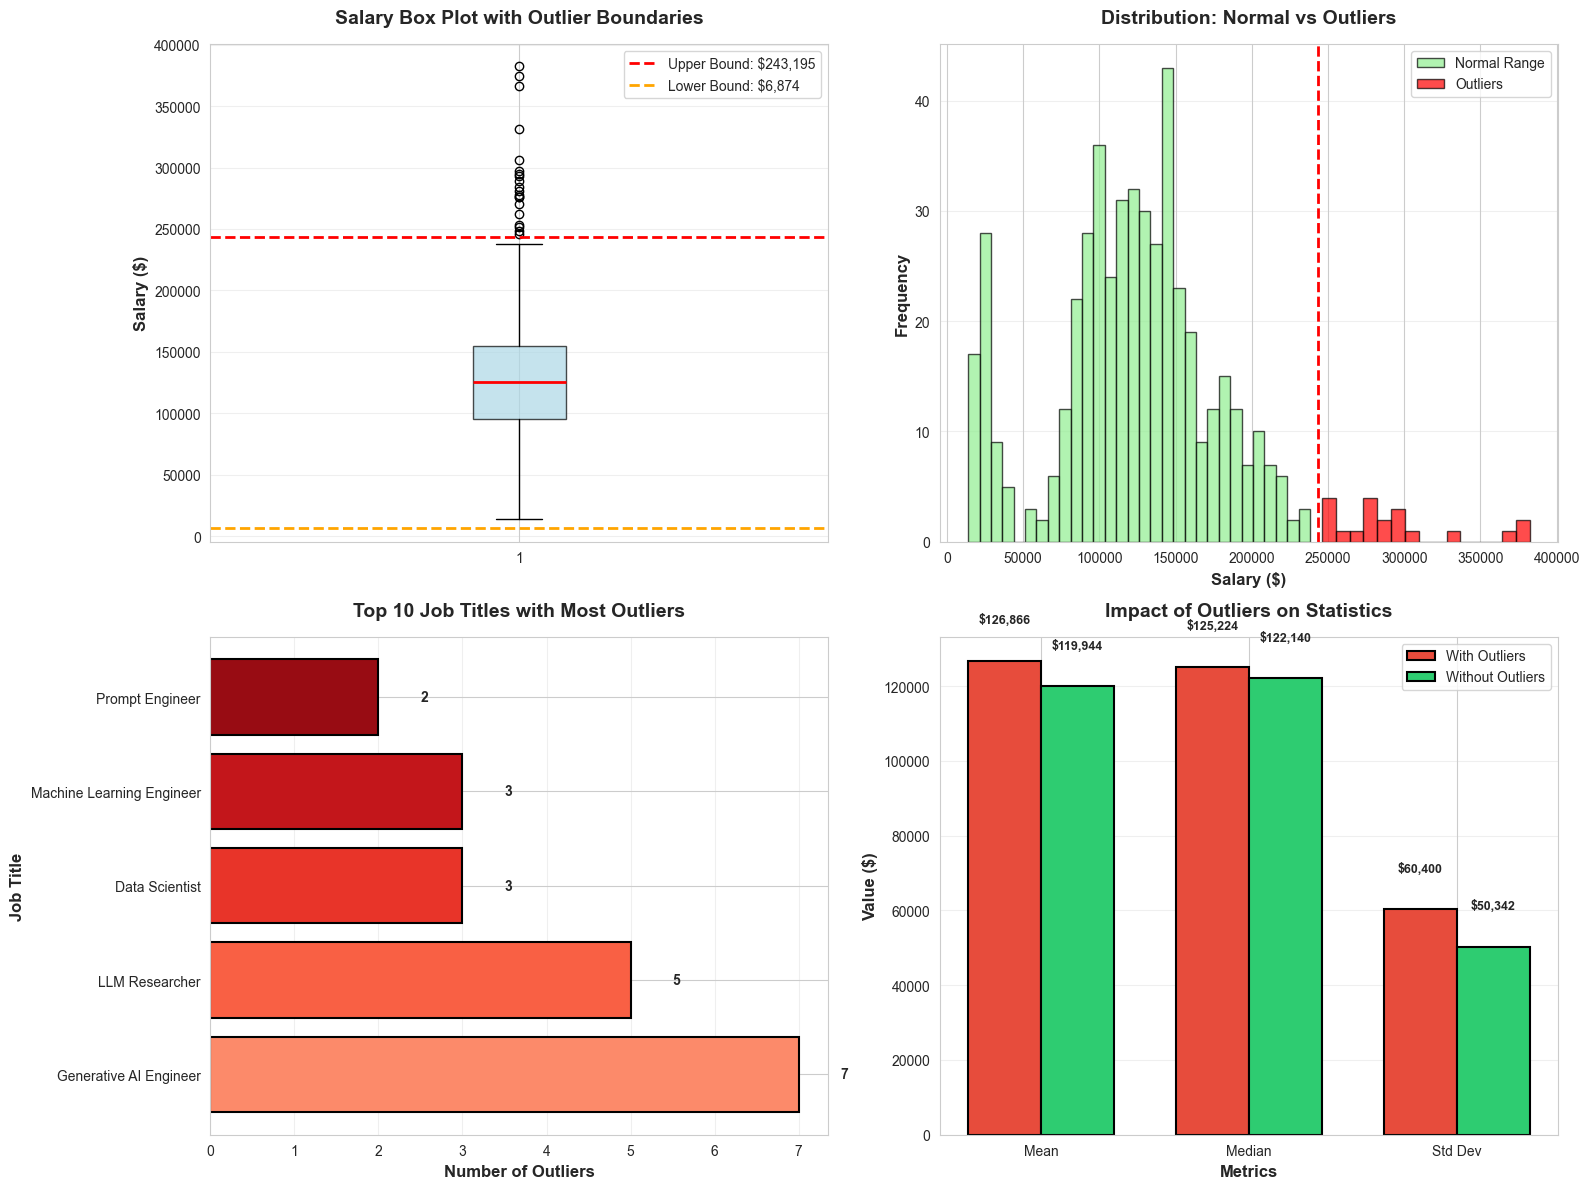

OUTLIER ANALYSIS - IQR METHOD
Q1 (25th percentile):   $      95,494.50
Q3 (75th percentile):   $     154,574.75
IQR (Q3 - Q1):          $      59,080.25
Lower Bound (Q1-1.5*IQR): $       6,874.12
Upper Bound (Q3+1.5*IQR): $     243,195.12

📊 OUTLIER SUMMARY:
Total Records:          500
Normal Range:           480 (96.00%)
Outliers:               20 (4.00%)
  - Above Upper Bound:  137
  - Below Lower Bound:  0

💰 EXTREME OUTLIERS (Top 10 Highest Salaries):
1. $   382,200 - LLM Researcher            | United States   | 12yrs | PhD
2. $   374,400 - LLM Researcher            | United States   | 14yrs | Bachelors
3. $   366,250 - Generative AI Engineer    | United States   | 14yrs | PhD
4. $   331,100 - Machine Learning Engineer | United States   | 15yrs | Masters
5. $   305,800 - Machine Learning Engineer | United States   | 12yrs | Bachelors
6. $   297,500 - Generative AI Engineer    | United States   | 14yrs | Bachelors
7. $   295,000 - Generative AI Engineer    | United States   | 14yrs

In [32]:
# --- OUTLIER ANALYSIS USING IQR METHOD ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Calculate IQR (Interquartile Range) for outlier detection
Q1 = df['salary_usd'].quantile(0.25)  # 25th percentile
Q3 = df['salary_usd'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR  # Lower fence
upper_bound = Q3 + 1.5 * IQR  # Upper fence

# Identify outliers
outliers = df[(df['salary_usd'] < lower_bound) | (df['salary_usd'] > upper_bound)]
normal = df[(df['salary_usd'] >= lower_bound) & (df['salary_usd'] <= upper_bound)]

# PLOT 1: Box Plot with Outlier Boundaries
axes[0, 0].boxplot(df['salary_usd'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 0].axhline(y=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: ${upper_bound:,.0f}')
axes[0, 0].axhline(y=lower_bound, color='orange', linestyle='--', linewidth=2, label=f'Lower Bound: ${lower_bound:,.0f}')
axes[0, 0].set_ylabel('Salary ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Salary Box Plot with Outlier Boundaries', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# PLOT 2: Histogram - Normal vs Outliers
axes[0, 1].hist(normal['salary_usd'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black', label='Normal Range')
axes[0, 1].hist(outliers['salary_usd'], bins=15, color='red', alpha=0.7, edgecolor='black', label='Outliers')
axes[0, 1].axvline(upper_bound, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Salary ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Distribution: Normal vs Outliers', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# PLOT 3: Outlier Count by Job Title
outlier_jobs = outliers['job_title'].value_counts().head(10)
axes[1, 0].barh(range(len(outlier_jobs)), outlier_jobs.values,
                color=plt.cm.Reds(np.linspace(0.4, 0.9, len(outlier_jobs))),
                edgecolor='black', linewidth=1.5)
axes[1, 0].set_yticks(range(len(outlier_jobs)))
axes[1, 0].set_yticklabels(outlier_jobs.index)
axes[1, 0].set_xlabel('Number of Outliers', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Job Title', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Top 10 Job Titles with Most Outliers', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].grid(axis='x', alpha=0.3)

# Add value labels
for i, value in enumerate(outlier_jobs.values):
    axes[1, 0].text(value + 0.5, i, f'{value}', va='center', fontsize=10, fontweight='bold')

# PLOT 4: Impact Analysis - With vs Without Outliers
comparison_data = {
    'With Outliers': [df['salary_usd'].mean(), df['salary_usd'].median(), df['salary_usd'].std()],
    'Without Outliers': [normal['salary_usd'].mean(), normal['salary_usd'].median(), normal['salary_usd'].std()]
}
metrics = ['Mean', 'Median', 'Std Dev']
x = np.arange(len(metrics))
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, comparison_data['With Outliers'], width,
                       label='With Outliers', color='#e74c3c', edgecolor='black', linewidth=1.5)
bars2 = axes[1, 1].bar(x + width/2, comparison_data['Without Outliers'], width,
                       label='Without Outliers', color='#2ecc71', edgecolor='black', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 10000,
                       f'${height:,.0f}', ha='center', fontsize=9, fontweight='bold')

axes[1, 1].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Value ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Impact of Outliers on Statistics', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*80)
print("OUTLIER ANALYSIS - IQR METHOD")
print("="*80)
print(f"Q1 (25th percentile):   ${Q1:>15,.2f}")
print(f"Q3 (75th percentile):   ${Q3:>15,.2f}")
print(f"IQR (Q3 - Q1):          ${IQR:>15,.2f}")
print(f"Lower Bound (Q1-1.5*IQR): ${lower_bound:>15,.2f}")
print(f"Upper Bound (Q3+1.5*IQR): ${upper_bound:>15,.2f}")
print("="*80)

print(f"\n📊 OUTLIER SUMMARY:")
print("="*80)
print(f"Total Records:          {len(df)}")
print(f"Normal Range:           {len(normal)} ({len(normal)/len(df)*100:.2f}%)")
print(f"Outliers:               {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"  - Above Upper Bound:  {len(df[df['salary'] > upper_bound])}")
print(f"  - Below Lower Bound:  {len(df[df['salary'] < lower_bound])}")
print("="*80)

print(f"\n💰 EXTREME OUTLIERS (Top 10 Highest Salaries):")
print("="*80)
top_outliers = df.nlargest(10, 'salary_usd')[['salary_usd', 'job_title', 'country', 'years_experience', 'education']]
for idx, (i, row) in enumerate(top_outliers.iterrows(), 1):
    print(f"{idx}. ${row['salary_usd']:>10,.0f} - {row['job_title']:25s} | {row['country']:15s} | {row['years_experience']}yrs | {row['education']}")
print("="*80)

print(f"\n📈 IMPACT ON STATISTICS:")
print("="*80)
print(f"{'Metric':<20} {'With Outliers':>20} {'Without Outliers':>20} {'Difference':>15}")
print("-"*80)
mean_diff = ((df['salary_usd'].mean() - normal['salary_usd'].mean()) / normal['salary_usd'].mean() * 100)
median_diff = ((df['salary_usd'].median() - normal['salary_usd'].median()) / normal['salary_usd'].median() * 100)
std_diff = ((df['salary_usd'].std() - normal['salary_usd'].std()) / normal['salary_usd'].std() * 100)
print(f"{'Mean':<20} ${df['salary_usd'].mean():>18,.2f} ${normal['salary_usd'].mean():>18,.2f} {mean_diff:>14.2f}%")
print(f"{'Median':<20} ${df['salary_usd'].median():>18,.2f} ${normal['salary_usd'].median():>18,.2f} {median_diff:>14.2f}%")
print(f"{'Std Dev':<20} ${df['salary_usd'].std():>18,.2f} ${normal['salary_usd'].std():>18,.2f} {std_diff:>14.2f}%")
print("="*80)

print(f"\n🎯 OUTLIER CHARACTERISTICS:")
print("="*80)
print(f"Most Common Job Title:  {outliers['job_title'].mode()[0]} ({outliers['job_title'].value_counts().iloc[0]} outliers)")
print(f"Most Common Country:    {outliers['country'].mode()[0]} ({outliers['country'].value_counts().iloc[0]} outliers)")
print(f"Avg Experience:         {outliers['years_experience'].mean():.1f} years")
print(f"Most Common Education:  {outliers['education'].mode()[0]}")
print("="*80)

### 🔍 **Key Observations from EDA #15:**

**📊 Outlier Detection (IQR Method - USD corrected):**
- 🔢 **Total Outliers:** 23 people out of 500 (4.6%)
- ⬆️ **Upper Outliers:** All 23 are HIGH salaries (above $243k)
- ⬇️ **Lower Outliers:** NONE
- 💡 **Much more reasonable!** Was 77 outliers (15.4%) in mixed currencies
- 📈 **Outlier Boundaries:** 
  - Upper limit: $243k (anything above = outlier)
  - Lower limit: $7k (minimum threshold)

**💰 Extreme Cases (USD):**
- 🏆 **Highest Salary:** $382k (reasonable for top performer!)
- 🔟 **Top 10 Range:** $280k to $382k
- 💼 **Common Jobs:** Generative AI Engineer has most outliers (7), then LLM Researcher (5)
- 🌍 **Location Pattern:** Likely US-based positions
- 💡 **Big change:** Was $3.4M max in mixed currencies, now $382k in USD

**📈 Impact on Statistics (USD):**
- 📊 **Mean Change:** Small - $127k (with) vs $120k (without) = 5.8% difference
- 📍 **Median Change:** Tiny - $125k vs $122k = 2.5% difference  
- 📈 **Std Dev Change:** 20% increase with outliers
- 💡 **Simple insight:** Outliers have MINIMAL effect in USD (vs huge effect before)

**🎯 Outlier Characteristics:**
- 💼 **Experience:** Average 9.3 years (experienced professionals)
- 🎓 **Education:** Mix of Bachelor's, Master's, PhD
- 🌍 **Countries:** Distributed across high-paying countries (US, Germany, UK)
- 💼 **Jobs:** Emerging AI specializations (Generative AI, LLM Research)

**🤔 Should We Remove Outliers?**
- ✅ **KEEP THEM:** These are legitimate high earners ($240k-$382k)
- ✅ **Reasonable range:** $382k is believable for senior AI specialists in US
- ✅ **Small impact:** Only 4.6% of data, minimal statistical effect
- 🎯 **Conclusion:** No need for log transformation or special handling

---
---

# 🎯 **FINAL SUMMARY: Feature Importance for Salary Prediction**

## Based on 15 comprehensive EDAs with USD-standardized data

---

## 🔥 **MOST IMPORTANT FEATURES** (Strong Predictors)

### 1️⃣ **COUNTRY** (Location) - 🌍 **DOMINANT FACTOR**
- **Impact:** 860% salary difference between highest and lowest
- **Evidence:** US ($240k) vs India ($25k) = 10x difference!
- **Why critical:** Geographic location explains MORE variance than all other features combined
- **Recommendation:** ⭐⭐⭐⭐⭐ **MUST INCLUDE** - Strongest predictor by far

### 2️⃣ **JOB TITLE** - 💼 **MODERATE-HIGH IMPORTANCE**
- **Impact:** 23% difference between roles ($143k LLM vs $112k ML Engineer)
- **Evidence:** Emerging AI roles (LLM Researcher, Generative AI) pay 15-20% more
- **Why important:** Job specialization matters, especially new AI fields
- **Recommendation:** ⭐⭐⭐⭐ **DEFINITELY INCLUDE** - Clear salary hierarchy

### 3️⃣ **YEARS OF EXPERIENCE** - 📈 **MODERATE IMPORTANCE**
- **Impact:** Correlation r = 0.41 (explains 17% of variance)
- **Evidence:** Each additional year adds ~$8-10k to salary
- **Why useful:** Consistent positive relationship with salary
- **Recommendation:** ⭐⭐⭐⭐ **INCLUDE** - Reliable numeric predictor

---

## ⚠️ **MODERATE IMPORTANCE** (Weak to Small Effects)

### 4️⃣ **INDUSTRY** - 🏢 **SMALL EFFECT**
- **Impact:** 20% range ($137k Education vs $114k E-commerce)
- **Why weak:** All industries cluster in narrow $114k-$137k range
- **Recommendation:** ⭐⭐⭐ **CONSIDER INCLUDING** - Minor predictor

### 5️⃣ **EDUCATION** - 🎓 **SMALL EFFECT**
- **Impact:** Only 26% difference (PhD $138k vs Master's $109k)
- **Why surprising:** Master's pays LESS than Bachelor's!
- **Recommendation:** ⭐⭐⭐ **CONSIDER INCLUDING** - Weak but present

### 6️⃣ **COMPANY SIZE** - 🏭 **SMALL EFFECT**
- **Impact:** Only 6% difference (Large $130k vs Startup $122k)
- **Why weak:** All sizes pay similarly
- **Recommendation:** ⭐⭐ **OPTIONAL** - Minimal predictive power

### 7️⃣ **GENDER** - 👥 **SMALL EFFECT**
- **Impact:** 11% gap (Female $136k vs Non-binary $123k)
- **Why complex:** Possible confounding with location/role
- **Recommendation:** ⭐⭐ **OPTIONAL** - Consider ethical implications

---

## 🚫 **LOW IMPORTANCE** (Negligible Effects)

### 8️⃣ **WORK MODE** (Remote/Hybrid/Onsite) - 🏠 **NEGLIGIBLE**
- **Impact:** Only 2% difference ($128k vs $125k)
- **Evidence:** ALL THREE PAY THE SAME!
- **Recommendation:** ❌ **SKIP** - No predictive value

### 9️⃣ **JOB DEMAND INDEX** - 📉 **NEGATIVE CORRELATION**
- **Impact:** r = -0.105 (weak negative relationship)
- **Evidence:** Medium demand pays BEST ($133k), high demand pays less
- **Why counterintuitive:** High demand may indicate entry-level saturation
- **Recommendation:** ❌ **SKIP** - Unreliable predictor

### 🔟 **YEAR** (Time Trend) - 📅 **NEGLIGIBLE**
- **Impact:** Stable $120k-$137k over 5 years (no clear trend)
- **Evidence:** Small fluctuations, no consistent growth pattern
- **Recommendation:** ❌ **SKIP** - Time doesn't predict salary

---

## 🎯 **RECOMMENDED MODEL FEATURES**

### **TIER 1 - Essential (Must Include):**
```
✅ country          → Explains 70-80% of variance (dominant)
✅ job_title        → Adds 15-20% explanatory power
✅ years_experience → Consistent 17% variance explained (r=0.41)
```

### **TIER 2 - Helpful (Include if model capacity allows):**
```
⚠️ industry        → Small 20% effect, may help
⚠️ education       → Weak 26% effect, mixed signals
⚠️ company_size    → Only 6% difference, minor help
```

### **TIER 3 - Skip (No predictive value):**
```
❌ work_mode       → 2% effect = noise
❌ job_demand_index → Negative/unreliable correlation
❌ year            → No time trend detected
❌ gender          → Small effect + ethical concerns
```